# ***Done By: Nour Al-Smadi ***

# ***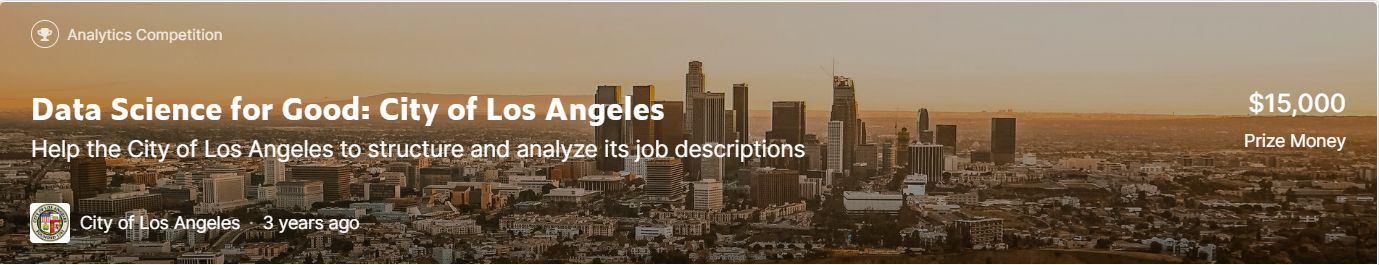***

# ***Conclusions and Answers***

# ***Q1- A non-experienced job seeker wants to know what is the best job for him?***

                     
```
                      ELECTRICAL TESTER          7512   
                      ELECTRICAL TESTER          7512   
         WAREHOUSE AND TOOLROOM WORKER          1832   
                  ADMINISTRATIVE CLERK           1358   
     FINGERPRINT IDENTIFICATION EXPERT           1157   
                         SECURITY AIDE           3199   
   MAINTENANCE AND CONSTRUCTION HELPER             3115   
                   ELECTRICAL MECHANIC          3841   
                   ELECTRICAL MECHANIC          3841   
                   ELECTRICAL MECHANIC          3841   
                   ELECTRICAL REPAIRER          3853   
                   ELECTRICAL REPAIRER          3853   
                   ELECTRICAL REPAIRER          3853   
             PROTECTIVE COATING WORKER          3463   
               ELECTRICAL CRAFT HELPER          3799   
               ELECTRICAL CRAFT HELPER          3799   
                     GALLERY ATTENDANT          2442   
                     DETENTION OFFICER          3211   
                     DETENTION OFFICER          3211   
                     DETENTION OFFICER          3211   
                     MECHANICAL HELPER           3771   
          CUSTOMER SERVICE SPECIALIST
          ```



# ***Q2- A concerned parents contacts you to tell them if there is a spicific school type that would guaranteed for their child a good future if you can tell, and which is it ?***



```
college or university , Major: Engineering.
```



# ***Q3-What the best time in the year to be ready for a job applying in any experience level?***



```
October, March, December
In order of most
```



# ***Q4-Is experience more important than educational level?***


```
Yes, it can be said that experience is more important.
```



# ***Q5:-***


```
Worka at or as one of realated felids of:
Works at government agency.
Planning Associate.
Electrical and architecture engineer .
Accountant.
Management Assistant.
Principal Public Relations.
Structural Engineer.
IT
```



# ***Q6:-***
` LA jobs are not biased for any gender, I couldn't find any gender biased or racist pronouns in Requirement`

# ***َQ7:-***


```
build a new schools for more fresh non-experienced workers
```



I don't know exactly why the choice was between these two options, because people without experience will have less chance of getting a job, and a promotion for existing workers will not affect non-workers! But I will say that the impediment was the material reasons, because the material ability allows either this or this, and for this I will say helping the newcomers to obtain experience in order to get a job, the number of jobs for the inexperienced is few, and it is often in the manual fields outside the scope of his specific certificate, to obtain a A job in the field he wants needs a little experience! Experience and getting a job will give him the opportunity to get promotions later.

# ***Q8:-***
`82K-110K ($)`

# ***Q9:- The most feature that effect the salary of the worker ***


```
Experience length
EDUCATION_YEARS
EDUCATION_MAJOR
```



# ***Q10&Q11***


```
The full statistical description at the end of the notebook
```



# ***Let's Begin***

## *Let us start with importing Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import re
import os
import numpy as np
from datetime import datetime
from collections  import Counter
from nltk import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import word2vec
from sklearn.manifold import TSNE
from nltk import pos_tag
from nltk.help import upenn_tagset
import gensim
import matplotlib.colors as mcolors
from nltk import jaccard_distance
from nltk import ngrams
import re
import pandas as pd
import numpy as np
import re
import glob
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
%matplotlib inline

### I have stored the data files on Google Drive for easy access 

This cell allows Colab to access the drive


In [ ]:

from google.colab import drive
drive.mount('/content/drive')


"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [ ]:
import os 
inputFolder = r'/content/drive/MyDrive/cityofla' 
for root, directories, filenames in os.walk(inputFolder): 
    for filename in filenames: print(os.path.join(root,filename))

/content/drive/MyDrive/cityofla/Additional data/kaggle_data_dictionary - output_fields.csv
/content/drive/MyDrive/cityofla/Additional data/Description of promotions in job bulletins.docx
/content/drive/MyDrive/cityofla/Additional data/job_titles .csv
/content/drive/MyDrive/cityofla/Additional data/City Job Paths/Accounting_Aide.pdf
/content/drive/MyDrive/cityofla/Additional data/City Job Paths/Accountant.pdf
/content/drive/MyDrive/cityofla/Additional data/City Job Paths/Electrical_Engineering_Associate.pdf
/content/drive/MyDrive/cityofla/Additional data/City Job Paths/Carpenter.pdf
/content/drive/MyDrive/cityofla/Additional data/City Job Paths/Equipment_Mechanic.pdf
/content/drive/MyDrive/cityofla/Additional data/City Job Paths/Building_Operating_Engineer.pdf
/content/drive/MyDrive/cityofla/Additional data/City Job Paths/Garage_Attendant.pdf
/content/drive/MyDrive/cityofla/Additional data/City Job Paths/Event_Services_Coordinator.pdf
/content/drive/MyDrive/cityofla/Additional data/City

In [ ]:
print(os.listdir(r"/content/drive/MyDrive/cityofla"))

['Additional data', 'Job Bulletins']


### Now we have text files that we want to convert to csv, and the secret and the greatest solution in our case is the **re** library

We will start with the main columns, and we will enter the keywords in each of them to separate them from each other and store them in this column allocated to them.


In [ ]:
rx_dict = {
    'TITLE': re.compile(r'(?P<title>.*)(\n+.*Class Code:)'),
    'Class Code': re.compile(r'(Class Code:)(?P<classcode>.*)(\n)'),
    'Open Date': re.compile(r'(Open Date:)(?P<open_date>.*)(\n)'),
    'Annual Salary': re.compile(r'ANNUAL\s*SALARY\s*\n*\s*(?P<Lowerend>\$\d*,\d*)(\s*to\s*(?P<Upperend>\$\d*,\d*)|.*)'),
    'Salary DWP': re.compile(r'ANNUAL\s*SALARY(.|\n)*?.*Department of Water and Power.*(?P<Lowerend>\$\d*,\d*)(\s*to\s*(?P<Upperend>\$\d*,\d*))'),
    'DUTIES': re.compile(r'(DUTIES(?P<Duties>(.|\n)*?))(SELECTION PROCESS|APPLICATION DEADLINE|WHERE TO APPLY|MINIMUM\s*QUALIFICATIONS|QUALIFICATIONS|REQUIREMENTS|QUALIFICATION|REQUIREMENT|\Z)'),
    'REQUIREMENTS': re.compile(r'((REQUIREMENT|REQUIREMENT/MINIMUM QUALIFICATION|QUALIFICATION|QUALIFICATIONS)(?P<Requirement>(.|\n)*?))(SELECTION PROCESS|APPLICATION DEADLINE|WHERE TO APPLY|\Z)'),
    'WHERE TO APPLY': re.compile(r'(WHERE TO APPLY(?P<WheretoApply>(.|\n)*?))(SELECTION PROCESS|APPLICATION DEADLINE|\Z)'),
    'APPLICATION DEADLINE': re.compile(r'(APPLICATION DEADLINE(?P<ApplicationDeadline>(.|\n)*?))(SELECTION PROCESS|\Z)'),
    'SELECTION PROCESS': re.compile(r'(SELECTION PROCESS(?P<SelectionProcess>(.|\n)*?))(\Z)'),
    'ALL':re.compile(r'(DUTIES(?P<Duties>(.|\n)*))((REQUIREMENTS|REQUIREMENTS\\MINIMUM QUALIFICATIONS|QUALIFICATIONS|REQUIREMENT|QUALIFICATION)(?P<Requirements>(.|\n)*))(WHERE TO APPLY(?P<Wheretoapply>(.|\n)*))(APPLICATION DEADLINE(?P<ApplicationDeadline>(.|\n)*))(SELECTION PROCESS(?P<SelectionProcess>(.|\n)*))')
}

In [ ]:
def convert_jobs_to_df(
    path='/content/drive/MyDrive/cityofla/Job Bulletins/*.txt',
    raw_text_col_name='raw_job_text'):
    
  
    
    
    job_list = []
    
    files = glob.glob(path)
    for file in files:
        with open(file, 'r', errors='replace') as f:
            content = f.read()
            job_list.append(content)
            
    return pd.DataFrame({raw_text_col_name:job_list})

# Here we will remove spaces for each of the columns


In [ ]:
def _whole_clean_text(text):
    return text.replace("\n","").replace("\t","").strip()

def pre_processing(dataframe):
    # remove all first new line charecters from text
    dataframe['raw_job_text'] = dataframe['raw_job_text'].apply(
        lambda x: x.lstrip())
    return dataframe

def extract_job_title(dataframe):
    # split at newline charecter, then grab first text
    # and that is the title
    dataframe['JOB_CLASS_TITLE'] = dataframe['raw_job_text'].apply(
        lambda x: x.split('\n', 1)[0])
    dataframe['JOB_CLASS_TITLE'] = dataframe['JOB_CLASS_TITLE'].apply(
        lambda x: _whole_clean_text(x))
    return dataframe

def extract_class_code(dataframe):
    # remove all extra white spaces
    temp = dataframe['raw_job_text'].apply(lambda x: ' '.join(x.split()))
    # find class code
    dataframe['JOB_CLASS_NO'] = temp.apply(lambda x: _class_code_apply(x))
    return dataframe

def extract_open_date(dataframe):
    # remove all extra white spaces
    temp = dataframe['raw_job_text'].apply(lambda x: ' '.join(x.split()))
    
    dataframe['OPEN_DATE'] = temp.apply(lambda x: _open_date_apply(x))
    return dataframe

def extract_exam_type(dataframe):
    # remove all extra white spaces
    temp = dataframe['raw_job_text'].apply(lambda x: ' '.join(x.split()))
    
    dataframe['TEMP_EXAM_TYPE'] = temp.apply(lambda x: _exam_type_apply(x))
    return dataframe

def extract_salary(dataframe):
    # remove all extra white spaces
    temp = dataframe['raw_job_text'].apply(lambda x: ' '.join(x.split()))
    
    dataframe['TEMP_SALARY'] = temp.apply(lambda x: _salary_apply(x))
    return dataframe


def extract_duties(dataframe):
    # remove all extra white spaces
    temp = dataframe['raw_job_text'].apply(lambda x: ' '.join(x.split()))
    
    dataframe['JOB_DUTIES'] = temp.apply(lambda x: _duties_apply(x))
    return dataframe

def extract_requirements(dataframe):
    # remove all extra white spaces
    temp = dataframe['raw_job_text'].apply(lambda x: ' '.join(x.split()))
    
    dataframe['TEMP_REQUIREMENTS'] = temp.apply(lambda x: _requirements_apply(x))
    return dataframe

def extract_where_to_apply(dataframe):
    # remove all extra white spaces
    temp = dataframe['raw_job_text'].apply(lambda x: ' '.join(x.split()))
    
    dataframe['WHERE_TO_APPLY'] = temp.apply(lambda x: _where_to_apply(x))
    return dataframe

def extract_deadline(dataframe):
    # remove all extra white spaces
    temp = dataframe['raw_job_text'].apply(lambda x: ' '.join(x.split()))
    
    dataframe['DEADLINE'] = temp.apply(lambda x: _deadline_apply(x))
    return dataframe

def extract_selection_process(dataframe):
    # remove all extra white spaces
    temp = dataframe['raw_job_text'].apply(lambda x: ' '.join(x.split()))
    
    dataframe['SELECTION_PROCESS'] = temp.apply(lambda x: _selection_process_apply(x))
    return dataframe

Now for the biggest cell in the process of getting the data, I took some of this code from the documentation of the re library. There is no need to modify the base, we need to customize it for our task, and this is what I did here.


We will search for the keywords for each column, to put them in groups to convert them to the required columns


In [ ]:
def _class_code_apply(text):
    """
    This class extract job class code
    """
    match = re.search('Class Code: (\d+)', text)
    class_code = None
    try:
        class_code = match.group(1)
    except:
        class_code = None
    return class_code
        

def _open_date_apply(text):
    
    """
    Extract entire job open date section
    """
    
    open_date = ''
    result= re.search(
        "(Class Code:|Class  Code:)(.*)(ANNUAL SALARY|ANNUALSALARY)",
        text)
    
    shortContent=''
    if result:
        shortContent=result.group(2).strip()
        result= re.search(
            "Open Date:(.*)REVISED",
            shortContent,flags=re.IGNORECASE)
        if result:
            open_date=result.group(1).strip()
        if open_date=='':
            result= re.search(
                "Open Date:(.*)\(Exam",
                shortContent,flags=re.IGNORECASE)
            if result:
                open_date=result.group(1).strip()
        if open_date=='':
            result= re.search(
                "Open Date:(.*)",
                shortContent,flags=re.IGNORECASE)
            if result:
                open_date=result.group(1).strip()
    return open_date


def _exam_type_apply(text):
    
    """
    Extract entire exam type section
    """
    
    exam_type = ""
    result= re.search(
        "(Class Code:|Class  Code:)(.*)(ANNUAL SALARY|ANNUALSALARY)",
        text)
    
    shortContent=''
    if result:
        shortContent=result.group(2).strip()
        result= re.search(
            "\(+(.*?)\)", shortContent,flags=re.IGNORECASE)
        if result:
            exam_type=result.group(1).strip()
    return exam_type


def _salary_apply(text):
    """
    Extract entire salary section
    """
    salary = ''
    salary_notes = ''
    result=re.search(
        "(ANNUAL SALARY|ANNUALSALARY)(.*?)DUTIES", text)
    if result:
        salContent= result.group(2).strip()
        if "NOTE:" in salContent or "NOTES:" in salContent:
            result=re.search(
                "(.*?)(NOTE:|NOTES:)",
                salContent,flags=re.IGNORECASE)
            if result:
                salary=result.group(1).strip()  
            result= re.search(
                "(NOTE:|NOTES:)(.*)",
                salContent,flags=re.IGNORECASE)
            if result:
                salary_notes= result.group(2).strip()
        else:
            salary = salContent
    else:
        result=re.search(
            "(ANNUAL SALARY|ANNUALSALARY)(.*?)REQUIREMENT",
            text,flags=re.IGNORECASE)
        if result:
            salContent= result.group(2).strip()
            if "NOTE:" in salContent or "NOTES:" in salContent:
                result=re.search(
                    "(.*?)(NOTE:|NOTES:)",
                    salContent,flags=re.IGNORECASE)
                if result:
                    salary=result.group(1).strip()  
                result= re.search(
                    "(NOTE:|NOTES:)(.*)",
                    salContent,flags=re.IGNORECASE)
                if result:
                    salary_notes= result.group(2).strip()
            else:
                salary= salContent
    salary_text = "|||||||||||||||".join([salary, salary_notes])
    return salary_text


def _duties_apply(text):
    """
    Extract job duties section
    """
    duties=''
    result=duties= re.search("DUTIES(.*?)REQUIREMENT", text)
    if result:
        duties= result.group(1).strip()
    return duties

def _requirements_apply(text):
    """
    Extract entire job requirements section
    """
    req='|'.join(["REQUIREMENT/MIMINUMUM QUALIFICATION",
                  "REQUIREMENT/MINUMUM QUALIFICATION",
                  "REQUIREMENT/MINIMUM QUALIFICATION",
                  "REQUIREMENT/MINIMUM QUALIFICATIONS",
                  "REQUIREMENT/ MINIMUM QUALIFICATION",
                  "REQUIREMENTS/MINUMUM QUALIFICATIONS",
                  "REQUIREMENTS/ MINIMUM QUALIFICATIONS",
                  "REQUIREMENTS/MINIMUM QUALIFICATIONS",
                  "REQUIREMENTS/MINIMUM REQUIREMENTS",
                  "REQUIREMENTS/MINIMUM QUALIFCATIONS",
                  "MINIMUM REQUIREMENTS:",
                  "REQUIREMENTS",
                  "REQUIREMENT"])
    
    result= re.search(f"({req})(.*)(WHERE TO APPLY|HOW TO APPLY)", text)
    requirements=''
    if result:
        requirements = result.group(2).strip()
    return requirements


def _where_to_apply(text):
    
    """
    Extract entire 'WHERE TO APPLY' section
    """
    
    where_to_apply = ''
    result= re.search(
        "(HOW TO APPLY|WHERE TO APPLY)(.*)(APPLICATION DEADLINE|APPLICATION PROCESS)",
        text)
    if result:
        where_to_apply= result.group(2).strip()
    else:
        result= re.search(
            "(HOW TO APPLY|WHERE TO APPLY)(.*)(SELECTION PROCESS|SELELCTION PROCESS)",
            text)
        if result:
            where_to_apply= result.group(2).strip()
    return where_to_apply

def _deadline_apply(text):
    """
    Extract entire deadline section
    """
    
    deadline=''
    result= re.search(
        "(APPLICATION DEADLINE|APPLICATION PROCESS)(.*?)(SELECTION PROCESS|SELELCTION PROCESS)",
        text)
    if result:
        deadline= result.group(2).strip()
    else:
        result= re.search(
            "(APPLICATION DEADLINE|APPLICATION PROCESS)(.*?)(Examination Weight:)",
            text)
        if result:
            deadline= result.group(2).strip()
            
    return deadline

def _selection_process_apply(text):
    
    """
    Extract selectioin process section
    """
    
    selection_process=''
    result=selection_process= re.search(
        "(SELECTION PROCESS|Examination Weight:)(.*)(APPOINTMENT|APPOINTMENT IS SUBJECT TO:)",
        text)
    if result:
        selection_process= result.group(2).strip()
    else:
        result=selection_process= re.search(
            "(SELECTION PROCESS|Examination Weight:)(.*)",
            text)
        if result:
            selection_process= result.group(2).strip()
            
    return selection_process

# first let's convert folder of raw text job bulletins to pandas dataframe

 do some initial text cleaning


## Here is actual extraction of main section begin we just call the function


In [ ]:
data = convert_jobs_to_df()
data = pre_processing(data)
data = extract_job_title(data) # extract job title

data = extract_class_code(data) # extract class code

data = extract_open_date(data) # extract open date

data = extract_exam_type(data) # extract exam type section

data = extract_salary(data) # extract salary section

data = extract_duties(data) # extract duties section

data = extract_requirements(data) # extract requirements section

data = extract_where_to_apply(data) # extract where to apply section

data = extract_deadline(data) # extract deadline section

data = extract_selection_process(data) # extract selectin pro section

# create a new column containing whole text but clean from new line and tab 
data['raw_clean_job_text'] = data['raw_job_text'].apply(
    lambda x: _whole_clean_text(x))

# finally let's see what we have got
data

,raw_job_text,JOB_CLASS_TITLE,JOB_CLASS_NO,OPEN_DATE,TEMP_EXAM_TYPE,TEMP_SALARY,JOB_DUTIES,TEMP_REQUIREMENTS,WHERE_TO_APPLY,DEADLINE,SELECTION_PROCESS,raw_clean_job_text
0,CHIEF OF OPERATIONS\n\nClass Code: 7258\...,CHIEF OF OPERATIONS,7258,04-20-18,"Exam Open to All, including Current City Emplo...","$90,473 to $132,274 and $95,463 to $139,582|||...",A Chief of Operations supervises or assists in...,1. Three years of full-time paid experience as...,Applications will only be accepted online. Whe...,"Applications, Training and Experience Question...","After meeting minimum qualifications, and in a...",CHIEF OF OPERATIONSClass Code: 7258Open ...
1,EQUIPMENT SUPERINTENDENT\n\nClass Code: 3...,EQUIPMENT SUPERINTENDENT,3750,12-19-14,Exam Open to Current City Employees,"$107,385 to $133,423|||||||||||||||The current...",An Equipment Superintendent directs the activi...,Two years of full-time paid experience as a Se...,Applications will only be accepted on-line. Wh...,"Applications must be received by FRIDAY, JANUA...",Examination Weight: Essay. . . . . . . . . . ....,EQUIPMENT SUPERINTENDENTClass Code: 3750O...
2,PERSONNEL DIRECTOR\n\nClass Code: 1714\n...,PERSONNEL DIRECTOR,1714,05-04-18,Exam Open to Current City Employees,"$110,225 to $161,151; $116,280 to $170,004; an...","A Personnel Director directs, develops, implem...",Two years of full-time paid professional perso...,Applications will only be accepted on-line. Wh...,"Applications must be received by THURSDAY, MAY...",Examination Weight: Training and Experience Qu...,PERSONNEL DIRECTORClass Code: 1714Open D...
3,BUILDING CIVIL ENGINEER\n\nClass Code: 7...,BUILDING CIVIL ENGINEER,7244,03-23-18,Exam Open to Current City Employees,"$94,858 to $138,643 and $105,444 to $154,115||...",A Building Civil Engineer performs responsible...,Two years of full-time paid professional engin...,Applications will only be accepted on-line. Wh...,"Applications must be received by THURSDAY, APR...","After meeting the minimum qualifications, cand...",BUILDING CIVIL ENGINEERClass Code: 7244O...
4,DELIVERY DRIVER\n Class Code: 1121\n Open...,DELIVERY DRIVER,1121,03-23-18,"Exam Open to All, including Current City Emplo...","$36,519 to $53,390; $39,839 to $58,255; and $4...","A Delivery Driver operates a City automobile, ...",1. Current paid employment with the City of Lo...,Applications will only be accepted on-line. Wh...,"Applications must be received by THURSDAY, APR...","After meeting minimum qualifications, and in a...",DELIVERY DRIVER Class Code: 1121 Open Dat...
...,...,...,...,...,...,...,...,...,...,...,...,...
678,WASTEWATER TREATMENT ELECTRICIAN\n\n\nClass Co...,WASTEWATER TREATMENT ELECTRICIAN,5615,06-08-12,"Exam Open to All, including Current City Emplo...","$96,423 (flat-rated) and $106,028 (flat-rated)...",A Wastewater Treatment Electrician performs sk...,1. Completion of a recognized five-year electr...,Applications will only be accepted on-line. Wh...,Filing may be closed without prior notice afte...,"After meeting minimum qualifications, candidat...",WASTEWATER TREATMENT ELECTRICIANClass Code: ...
679,WATERWORKS ENGINEER \n\nClass Code: 7248\...,WATERWORKS ENGINEER,7248,07-15-16,Exam Open to Current City Employees,"$116,740 to $145,032|||||||||||||||1. For info...","A Waterworks Engineer plans, organizes, and di...",1. Two years of full-time paid professional en...,Applications and Qualifications Questionnaires...,Applications and Qualifications Questionnaires...,Examination Weight: Essay. . . . . . . . . . ....,WATERWORKS ENGINEER Class Code: 7248Open ...
680,UPHOLSTERER\n ...,UPHOLSTERER,3723,04-17-15,"Exam Open to All, including Current City Emplo...","$75,335 (flat-rated) The salary in the Departm...",An Upholsterer repairs and replaces upholstery...,Five years of full-time paid experience in aut...,Applications will only be accepted on-line. Wh...,"Applications must be received by THURSDAY, APR...",Demonstration of Job Knowledge and Evaluation ...,UPHOLSTERER ...
681,SENIOR PAIN

In [ ]:
################################
# ENTRY_SALARY_GEN
################################
def salary(content):   
    try:
        salary=re.compile(r'\$(\d+,\d+)((\s(to|and)\s)(\$\d+,\d+))?') #match salary
        sal=re.search(salary,content)
        if sal:
            range1=sal.group(1)
            if range1 and '$' not in range1:
                range1='$'+range1
            range2=sal.group(2)
            if range2:
                range2=sal.group(2).replace('to','')
                range2=range2.replace('and','')
            if range1 and range2:
                return f"{range1}-{range2.strip()}"
            elif range1:
                return f"{range1} (flat-rated)"
        else:
            return ''
    except Exception as e:
        return ''

################################
# ENTRY_SALARY_DWP
################################
def salaryDWP(content):
    try:
        result= re.search("(Department of Water and Power is)(.*)", content)
        if result:
            salary=re.compile(r'\$(\d+,\d+)((\s(to|and)\s)(\$\d+,\d+))?') #match salary
            sal=re.search(salary,result.group(2))
            if sal:
                range1=sal.group(1)
                if range1 and '$' not in range1:
                    range1='$'+range1
                range2=sal.group(2)
                if range2:
                    range2=sal.group(2).replace('to','')
                    range2=range2.replace('and','')
                if range1 and range2:
                    return f"{range1}-{range2.strip()}"
                elif range1:
                    return f"{range1} (flat-rated)"
            else:
                return ''
    except Exception as e:
        return ''  

################################
# DRIVERS_LICENSE_REQ
# Whether a driver's license is required, 
# possibly required, or not required
# (note: the job class will most likely not explicitly say if a license is not required)
# P,R
################################
def drivingLicenseReq(content):
    try:
        result= re.search(
            "(.*?)(California driver\'s license|driver\'s license)",
            content)
        
        if result:
            exp=result.group(1).strip()
            exp=' '.join(exp.split()[-10:]).lower()
            if 'may require' in exp:
                return 'P'
            else:
                return 'R'
        else:
            return ''
    except Exception as e:
        return '' 

################################
#DRIV_LIC_TYPE
################################
def drivingLicense(content):
    driving_License=[]
    result= re.search(
        "(valid California Class|valid Class|valid California Commercial Class)(.*?)(California driver\'s license|driver\'s license)",
        content)
    if result:
        dl=result.group(2).strip()
        dl=dl.replace("Class","").replace("commercial","").replace("or","").replace("and","")
        if 'A' in dl:
            driving_License.append('A')
        if 'B' in dl:
            driving_License.append('B') 
        if 'C' in dl:
            driving_License.append('C')  
        if 'I' in dl:
            driving_License.append('I')   
        return ','.join(driving_License)
    else:
        return ''

################################
#EXAM_TYPE
################################
def examType(content):
    '''Code explanation:
    OPEN: Exam open to anyone (pending other requirements)
    INT_DEPT_PROM: Interdepartmental Promotional
    DEPT_PROM: Departmental Promotional
    OPEN_INT_PROM: Open or Competitive Interdepartmental Promotional
    '''
    exam_type=''
    if 'INTERDEPARTMENTAL PROMOTIONAL AND AN OPEN COMPETITIVE BASIS' in content:
        exam_type='OPEN_INT_PROM' 
    elif 'OPEN COMPETITIVE BASIS' in content:
         exam_type='OPEN'
    elif 'INTERDEPARTMENTAL PROMOTIONAL' or 'INTERDEPARMENTAL PROMOTIONAL' in content:
        exam_type='INT_DEPT_PROM'
    elif 'DEPARTMENTAL PROMOTIONAL' in content:
        exam_type='DEPT_PROM' 
    return exam_type

def split_salary(text):
    """
    When we extracted salary section, 
    we merge general and DWP salary together 
    with a seperator '|||||||||||||||'
    This function split that
    """
    return text.split('|||||||||||||||')[0]

In [ ]:
# split salary into general and DWP
data['TEMP_SALARY'] = data['TEMP_SALARY'].apply(lambda x: split_salary(x))

# extract ENTRY_SALARY_GEN and ENTRY_SALARY_DWP
data['ENTRY_SALARY_GEN'] = data['TEMP_SALARY'].apply(lambda x: salary(x))
data['ENTRY_SALARY_DWP'] = data['TEMP_SALARY'].apply(lambda x: salaryDWP(x))

# extract DRIVERS_LICENSE_REQ and DRIV_LIC_TYPE
data['DRIVERS_LICENSE_REQ'] = data['TEMP_REQUIREMENTS'].apply(
    lambda x: drivingLicenseReq(x))
data['DRIV_LIC_TYPE'] = data['raw_clean_job_text'].apply(lambda x: drivingLicense(x))

# extract EXAM_TYPE
data['EXAM_TYPE'] = data['raw_clean_job_text'].apply(lambda x: examType(x))

# finally let's see what we have done
data[['ENTRY_SALARY_GEN', 'ENTRY_SALARY_DWP',
         'DRIVERS_LICENSE_REQ', 'DRIV_LIC_TYPE', 'EXAM_TYPE']].head(10)

,ENTRY_SALARY_GEN,ENTRY_SALARY_DWP,DRIVERS_LICENSE_REQ,DRIV_LIC_TYPE,EXAM_TYPE
0,"$90,473-$132,274",None,R,,OPEN
1,"$107,385-$133,423",None,P,B,INT_DEPT_PROM
2,"$110,225-$161,151",None,P,,INT_DEPT_PROM
3,"$94,858-$138,643",None,P,,INT_DEPT_PROM
4,"$36,519-$53,390","$36,769-$45,685",R,B,OPEN
5,"$81,682 (flat-rated)",None,R,,OPEN
6,"$66,147-$96,757",None,R,,INT_DEPT_PROM
7,"$64,352-$79,949",None,P,,OPEN_INT_PROM
8,"$109,974-$122,586",None,,,INT_DEPT_PROM
9,"$116,736-$145,032",None,P,,INT_DEPT_PROM


In [ ]:
data

,raw_job_text,JOB_CLASS_TITLE,JOB_CLASS_NO,OPEN_DATE,TEMP_EXAM_TYPE,TEMP_SALARY,JOB_DUTIES,TEMP_REQUIREMENTS,WHERE_TO_APPLY,DEADLINE,SELECTION_PROCESS,raw_clean_job_text,ENTRY_SALARY_GEN,ENTRY_SALARY_DWP,DRIVERS_LICENSE_REQ,DRIV_LIC_TYPE,EXAM_TYPE
0,CHIEF OF OPERATIONS\n\nClass Code: 7258\...,CHIEF OF OPERATIONS,7258,04-20-18,"Exam Open to All, including Current City Emplo...","$90,473 to $132,274 and $95,463 to $139,582",A Chief of Operations supervises or assists in...,1. Three years of full-time paid experience as...,Applications will only be accepted online. Whe...,"Applications, Training and Experience Question...","After meeting minimum qualifications, and in a...",CHIEF OF OPERATIONSClass Code: 7258Open ...,"$90,473-$132,274",None,R,,OPEN
1,EQUIPMENT SUPERINTENDENT\n\nClass Code: 3...,EQUIPMENT SUPERINTENDENT,3750,12-19-14,Exam Open to Current City Employees,"$107,385 to $133,423",An Equipment Superintendent directs the activi...,Two years of full-time paid experience as a Se...,Applications will only be accepted on-line. Wh...,"Applications must be received by FRIDAY, JANUA...",Examination Weight: Essay. . . . . . . . . . ....,EQUIPMENT SUPERINTENDENTClass Code: 3750O...,"$107,385-$133,423",None,P,B,INT_DEPT_PROM
2,PERSONNEL DIRECTOR\n\nClass Code: 1714\n...,PERSONNEL DIRECTOR,1714,05-04-18,Exam Open to Current City Employees,"$110,225 to $161,151; $116,280 to $170,004; an...","A Personnel Director directs, develops, implem...",Two years of full-time paid professional perso...,Applications will only be accepted on-line. Wh...,"Applications must be received by THURSDAY, MAY...",Examination Weight: Training and Experience Qu...,PERSONNEL DIRECTORClass Code: 1714Open D...,"$110,225-$161,151",None,P,,INT_DEPT_PROM
3,BUILDING CIVIL ENGINEER\n\nClass Code: 7...,BUILDING CIVIL ENGINEER,7244,03-23-18,Exam Open to Current City Employees,"$94,858 to $138,643 and $105,444 to $154,115",A Building Civil Engineer performs responsible...,Two years of full-time paid professional engin...,Applications will only be accepted on-line. Wh...,"Applications must be received by THURSDAY, APR...","After meeting the minimum qualifications, cand...",BUILDING CIVIL ENGINEERClass Code: 7244O...,"$94,858-$138,643",None,P,,INT_DEPT_PROM
4,DELIVERY DRIVER\n Class Code: 1121\n Open...,DELIVERY DRIVER,1121,03-23-18,"Exam Open to All, including Current City Emplo...","$36,519 to $53,390; $39,839 to $58,255; and $4...","A Delivery Driver operates a City automobile, ...",1. Current paid employment with the City of Lo...,Applications will only be accepted on-line. Wh...,"Applications must be received by THURSDAY, APR...","After meeting minimum qualifications, and in a...",DELIVERY DRIVER Class Code: 1121 Open Dat...,"$36,519-$53,390","$36,769-$45,685",R,B,OPEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,WASTEWATER TREATMENT ELECTRICIAN\n\n\nClass Co...,WASTEWATER TREATMENT ELECTRICIAN,5615,06-08-12,"Exam Open to All, including Current City Emplo...","$96,423 (flat-rated) and $106,028 (flat-rated)",A Wastewater Treatment Electrician performs sk...,1. Completion of a recognized five-year electr...,Applications will only be accepted on-line. Wh...,Filing may be closed without prior notice afte...,"After meeting minimum qualifications, candidat...",WASTEWATER TREATMENT ELECTRICIANClass Code: ...,"$96,423 (flat-rated)",None,,,OPEN_INT_PROM
679,WATERWORKS ENGINEER \n\nClass Code: 7248\...,WATERWORKS ENGINEER,7248,07-15-16,Exam Open to Current City Employees,"$116,740 to $145,032","A Waterworks Engineer plans, organizes, and di...",1. Two years of full-time paid professional en...,Applications and Qualifications Questionnaires...,Applications and Qualifications Questionnaires...,Examination Weight: Essay. . . . . . . . . . ....,WATERWORKS ENGINEER Class Code: 7248Open ...,"$116,740-$145,032",None,P,,INT_DEPT_PROM
680,UPHOLSTERER\n ...,UPHOLSTERER,3723,04-17-15,"Exam Open to All, including Current City Emplo...","$75,335 (flat-rated

In [ ]:
data.shape

(683, 17)

In [ ]:
data.columns.values

array(['raw_job_text', 'JOB_CLASS_TITLE', 'JOB_CLASS_NO', 'OPEN_DATE',
       'TEMP_EXAM_TYPE', 'TEMP_SALARY', 'JOB_DUTIES', 'TEMP_REQUIREMENTS',
       'WHERE_TO_APPLY', 'DEADLINE', 'SELECTION_PROCESS',
       'raw_clean_job_text', 'ENTRY_SALARY_GEN', 'ENTRY_SALARY_DWP',
       'DRIVERS_LICENSE_REQ', 'DRIV_LIC_TYPE', 'EXAM_TYPE'], dtype=object)

In [ ]:
data['raw_clean_job_text']

0      CHIEF OF OPERATIONSClass Code:       7258Open ...
1      EQUIPMENT SUPERINTENDENTClass Code:      3750O...
2      PERSONNEL DIRECTORClass Code:       1714Open D...
3      BUILDING CIVIL ENGINEERClass Code:       7244O...
4      DELIVERY DRIVER   Class Code:    1121 Open Dat...
                             ...                        
678    WASTEWATER TREATMENT ELECTRICIANClass Code:   ...
679    WATERWORKS ENGINEER Class Code:      7248Open ...
680    UPHOLSTERER                                   ...
681    SENIOR PAINTERClass Code:       3424Open Date:...
682    TRANSPORTATION ENGINEER  Class Code:      7278...
Name: raw_clean_job_text, Length: 683, dtype: object

In [ ]:
# function for seperating process notes
# from requirements section
def _seperate_process_notes(text):
    result = re.search('(.*)(PROCESS NOTES|NOTES)(.*)', text)
    if result:
        req = result.group(1)
        process_notes = result.group(3)
    else:
        req = text 
        process_notes = None
    return req, process_notes

def _split_requirements(text):
    req_list = re.split('or \d\.', text)
    return req_list


# function for spliting requirements section 
# numbered points and store them as seperate rows
def split_list_to_rows(dataframe, col_name):
    # here col_name is the name of the column which contains list
    return pd.DataFrame({
          col:np.repeat(dataframe[col].values, dataframe[col_name].str.len())
          for col in dataframe.columns.drop(col_name)}
        ).assign(**{col_name:np.concatenate(dataframe[col_name].values)})[dataframe.columns]

In [ ]:
# seperate process notes
data['REQUIREMENTS'], data['REQUIREMENTS_PROCESS'] = \
zip(*data['TEMP_REQUIREMENTS'].apply(lambda x: _seperate_process_notes(x)))

# remove some text
data['REQUIREMENTS'] = data['REQUIREMENTS'].str.replace(r'PROCESS', '')
# df_jobs['REQUIREMENTS'].to_csv('./jobs_desc.csv', index=None)

# split requirements and store them as seperate rows
data['req_list'] = data['REQUIREMENTS'].apply(lambda x: _split_requirements(x))
df_jobs = split_list_to_rows(data, 'req_list')


# finally let's see what we did
df_jobs[['JOB_CLASS_TITLE', 'JOB_CLASS_NO', 'req_list']].head(20)

,JOB_CLASS_TITLE,JOB_CLASS_NO,req_list
0,CHIEF OF OPERATIONS,7258,1. Three years of full-time paid experience as...
1,CHIEF OF OPERATIONS,7258,Three years of full-time paid supervisory exp...
2,EQUIPMENT SUPERINTENDENT,3750,Two years of full-time paid experience as a Se...
3,PERSONNEL DIRECTOR,1714,Two years of full-time paid professional perso...
4,BUILDING CIVIL ENGINEER,7244,Two years of full-time paid professional engin...
5,DELIVERY DRIVER,1121,1. Current paid employment with the City of Lo...
6,CARPET LAYER,3418,1. Completion of a recognized three year appre...
7,CARPET LAYER,3418,Attainment of a journey level rank as a carpe...
8,CARPET LAYER,3418,Four years of full-time paid experience as a ...
9,PARK SERVICES SUPERVISOR,2426,Six years of full-time paid supervisory experi...


In [ ]:
df_jobs

,raw_job_text,JOB_CLASS_TITLE,JOB_CLASS_NO,OPEN_DATE,TEMP_EXAM_TYPE,TEMP_SALARY,JOB_DUTIES,TEMP_REQUIREMENTS,WHERE_TO_APPLY,DEADLINE,SELECTION_PROCESS,raw_clean_job_text,ENTRY_SALARY_GEN,ENTRY_SALARY_DWP,DRIVERS_LICENSE_REQ,DRIV_LIC_TYPE,EXAM_TYPE,REQUIREMENTS,REQUIREMENTS_PROCESS,req_list
0,CHIEF OF OPERATIONS\n\nClass Code: 7258\...,CHIEF OF OPERATIONS,7258,04-20-18,"Exam Open to All, including Current City Emplo...","$90,473 to $132,274 and $95,463 to $139,582",A Chief of Operations supervises or assists in...,1. Three years of full-time paid experience as...,Applications will only be accepted online. Whe...,"Applications, Training and Experience Question...","After meeting minimum qualifications, and in a...",CHIEF OF OPERATIONSClass Code: 7258Open ...,"$90,473-$132,274",None,R,,OPEN,1. Three years of full-time paid experience as...,1. In addition to the regular City applicatio...,1. Three years of full-time paid experience as...
1,CHIEF OF OPERATIONS\n\nClass Code: 7258\...,CHIEF OF OPERATIONS,7258,04-20-18,"Exam Open to All, including Current City Emplo...","$90,473 to $132,274 and $95,463 to $139,582",A Chief of Operations supervises or assists in...,1. Three years of full-time paid experience as...,Applications will only be accepted online. Whe...,"Applications, Training and Experience Question...","After meeting minimum qualifications, and in a...",CHIEF OF OPERATIONSClass Code: 7258Open ...,"$90,473-$132,274",None,R,,OPEN,1. Three years of full-time paid experience as...,1. In addition to the regular City applicatio...,Three years of full-time paid supervisory exp...
2,EQUIPMENT SUPERINTENDENT\n\nClass Code: 3...,EQUIPMENT SUPERINTENDENT,3750,12-19-14,Exam Open to Current City Employees,"$107,385 to $133,423",An Equipment Superintendent directs the activi...,Two years of full-time paid experience as a Se...,Applications will only be accepted on-line. Wh...,"Applications must be received by FRIDAY, JANUA...",Examination Weight: Essay. . . . . . . . . . ....,EQUIPMENT SUPERINTENDENTClass Code: 3750O...,"$107,385-$133,423",None,P,B,INT_DEPT_PROM,Two years of full-time paid experience as a Se...,: 1. Applicants who lack six months or less of...,Two years of full-time paid experience as a Se...
3,PERSONNEL DIRECTOR\n\nClass Code: 1714\n...,PERSONNEL DIRECTOR,1714,05-04-18,Exam Open to Current City Employees,"$110,225 to $161,151; $116,280 to $170,004; an...","A Personnel Director directs, develops, implem...",Two years of full-time paid professional perso...,Applications will only be accepted on-line. Wh...,"Applications must be received by THURSDAY, MAY...",Examination Weight: Training and Experience Qu...,PERSONNEL DIRECTORClass Code: 1714Open D...,"$110,225-$161,151",None,P,,INT_DEPT_PROM,Two years of full-time paid professional perso...,1. Applicants who lack six months or less of ...,Two years of full-time paid professional perso...
4,BUILDING CIVIL ENGINEER\n\nClass Code: 7...,BUILDING CIVIL ENGINEER,7244,03-23-18,Exam Open to Current City Employees,"$94,858 to $138,643 and $105,444 to $154,115",A Building Civil Engineer performs responsible...,Two years of full-time paid professional engin...,Applications will only be accepted on-line. Wh...,"Applications must be received by THURSDAY, APR...","After meeting the minimum qualifications, cand...",BUILDING CIVIL ENGINEERClass Code: 7244O...,"$94,858-$138,643",None,P,,INT_DEPT_PROM,Two years of full-time paid professional engin...,1. Applicants who lack six months or less of ...,Two years of full-time paid professional engin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,WASTEWATER TREATMENT ELECTRICIAN\n\n\nClass Co...,WASTEWATER TREATMENT ELECTRICIAN,5615,06-08-12,"Exam Open to All, including Current City Emplo...","$96,423 (flat-rated) and $106,028 (flat-rated)",A Wastewater Treatment Electrician performs sk...,1. Completion of a recognized five-year electr...,Applications will only be accepted on-line. Wh...,Filing may be

In [ ]:
data.columns.values

array(['raw_job_text', 'JOB_CLASS_TITLE', 'JOB_CLASS_NO', 'OPEN_DATE',
       'TEMP_EXAM_TYPE', 'TEMP_SALARY', 'JOB_DUTIES', 'TEMP_REQUIREMENTS',
       'WHERE_TO_APPLY', 'DEADLINE', 'SELECTION_PROCESS',
       'raw_clean_job_text', 'ENTRY_SALARY_GEN', 'ENTRY_SALARY_DWP',
       'DRIVERS_LICENSE_REQ', 'DRIV_LIC_TYPE', 'EXAM_TYPE',
       'REQUIREMENTS', 'REQUIREMENTS_PROCESS', 'req_list'], dtype=object)

In [ ]:
df_jobs.columns.values

array(['raw_job_text', 'JOB_CLASS_TITLE', 'JOB_CLASS_NO', 'OPEN_DATE',
       'TEMP_EXAM_TYPE', 'TEMP_SALARY', 'JOB_DUTIES', 'TEMP_REQUIREMENTS',
       'WHERE_TO_APPLY', 'DEADLINE', 'SELECTION_PROCESS',
       'raw_clean_job_text', 'ENTRY_SALARY_GEN', 'ENTRY_SALARY_DWP',
       'DRIVERS_LICENSE_REQ', 'DRIV_LIC_TYPE', 'EXAM_TYPE',
       'REQUIREMENTS', 'REQUIREMENTS_PROCESS', 'req_list'], dtype=object)

In [ ]:
def convert_dataturks_to_spacy(dataturks_JSON_FilePath):
    try:
        training_data = []
        lines=[]
        with open(dataturks_JSON_FilePath, 'r') as f:
            lines = f.readlines()

        for line in lines:
            data = json.loads(line)
            text = data['content']
            entities = []
            for annotation in data['annotation']:
                #only a single point in text annotation.
                point = annotation['points'][0]
                labels = annotation['label']
                # handle both list of labels or a single label.
                if not isinstance(labels, list):
                    labels = [labels]

                for label in labels:
                    #dataturks indices are both inclusive [start, end] but spacy is not [start, end)
                    entities.append((point['start'], point['end'] + 1 ,label))


            training_data.append((text, {"entities" : entities}))

        return training_data
    except Exception as e:
        logging.exception("Unable to process " + dataturks_JSON_FilePath + "\n" + "error = " + str(e))
        return None

In [ ]:
import logging
import json
TRAIN_DATA = convert_dataturks_to_spacy('/content/drive/MyDrive/city_la_jobs_ner_labeling.json')

TRAIN_DATA[0]

('"Two years of full-time paid experience in a class at least at the level of Communications Electrician engaged in the construction, installation, operation, repair, maintenance, or modification of electronic communication systems.  "',
 {'entities': [(118, 229, 'EXP_JOB_CLASS_FUNCTION'),
   (76, 102, 'EXP_JOB_CLASS_TITLE'),
   (14, 23, 'FULL_TIME_PART_TIME'),
   (1, 10, 'EXPERIENCE_LENGTH')]})

In [ ]:
def get_ent_ruler(nlp, name):
    ruler = EntityRuler(nlp)
    for a in animal:
        ruler.add_patterns([{"label": "animal", "pattern": a}])
    return ruler

In [ ]:
from spacy.training import Example
from spacy.tokens import Span


In [ ]:
from __future__ import unicode_literals, print_function

#import plac
import random
from pathlib import Path
import spacy
from spacy.util import minibatch, compounding
from tqdm import tqdm, tqdm_notebook


def ner_model(model=None, output_dir='./', n_iter=500):
    print('Training started...')
    """Load the model, set up the pipeline and train the entity recognizer."""
    if model is not None:
        nlp = spacy.load(model)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank("en")  # create blank Language class
        print("Created blank 'en' model")

    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if "ner" not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe('ner', last=True)
    # otherwise, get it so we can add labels
    else:
        ner = nlp.get_pipe("ner")

    # add labels
    for _, annotations in TRAIN_DATA:
        for ent in annotations.get("entities"):
            ner.add_label(ent[2])

    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
    with nlp.disable_pipes(*other_pipes):  # only train NER
        # reset and initialize the weights randomly – but only if we're
        # training a new model
        if model is None:
            nlp.begin_training()
        for itn in tqdm_notebook(range(n_iter)):
            random.shuffle(TRAIN_DATA)
            losses = {}
            # batch up the examples using spaCy's minibatch
            batches = minibatch(TRAIN_DATA, size=compounding(4.0, 32.0, 1.001))
            for batch in batches:
              texts, annotations = zip(*batch)
            
            example = []
            # Update the model with iterating each text
            for i in range(len(texts)):
              if i=='EXP_JOB_CLASS_TITLE':
                continue 
              else:
                doc = nlp.make_doc(texts[i])
               # example.append(Example.from_dict(doc, annotations[i]))
            
            # Update the model
            nlp.update(example, drop=0.5, losses=losses)
    print('Training completed.')
    return nlp
#             print("Losses", losses)

    # test the trained model
#     for text, _ in TRAIN_DATA:
#         doc = nlp(text)
#         print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
# #         print("Tokens", [(t.text, t.ent_type_, t.ent_iob) for t in doc])

    # save model to output directory
#     if output_dir is not None:
#         output_dir = Path(output_dir)
#         if not output_dir.exists():
#             output_dir.mkdir()
#         nlp.to_disk(output_dir)
#         print("Saved model to", output_dir)


# we have build our model class
# let's train our model

nlp = ner_model()

Training started...
Created blank 'en' model


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/500 [00:00<?, ?it/s]

Training completed.


#### **Note: For me this is a preliminary and experimental version of this big problem, but I'm proud of what I've reached.**

### Here I fell into a loophole, there are some columns that I could not get out using the Regex, so I needed the help of the NLP. Dealing with it was very new to me, but it was a good experience



### We will notice here that some of the code is missing. I programmed it outside because it caused me problems inside my program, and I could not return it because this would force me to reprogram many cells and restart them. It was a loophole for me. 
###I thought that the solution here is to take the final file I made and read it again from Panda, and it was a good idea.

### **Note:Regarding the analysis part, I am very proud of what I did with it, and I think it was very powerful.**

In [ ]:
data1 = pd.read_csv("jobs.csv")
data1

,JOB_CLASS_TITLE,JOB_CLASS_NO,REQUIREMENT_SET_ID,JOB_DUTIES,ENTRY_SALARY_GEN,ENTRY_SALARY_DWP,OPEN_DATE,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,...,COURSE_LENGTH,COURSE_SUBJECT,REQUIRED_CERTIFICATE,CERTIFICATE_ISSUED_BY,DRIVERS_LICENSE_REQ,DRIV_LIC_TYPE,EXAM_TYPE,req_list,raw_clean_job_text,REQUIREMENTS
0,ARTS ASSOCIATE,2454,1,An Arts Associate performs a broad range of en...,"$48,797-$71,326",NaN,07-21-17,four-year,college or university,"Arts (design, literary, media/communication, p...",...,NaN,NaN,NaN,NaN,P,NaN,OPEN,1. A bachelor's degree from an accredited four...,ARTS ASSOCIATEClass Code: 2454 ...,1. A bachelor's degree from an accredited four...
1,ARTS ASSOCIATE,2454,2,An Arts Associate performs a broad range of en...,"$48,797-$71,326",NaN,07-21-17,two-year,college with a,"Arts (design, literary, media/communication, p...",...,9 semester units or 14 quarter units,NaN,NaN,NaN,P,NaN,OPEN,An associate of arts degree from an accredite...,ARTS ASSOCIATEClass Code: 2454 ...,1. A bachelor's degree from an accredited four...
2,ARTS ASSOCIATE,2454,3,An Arts Associate performs a broad range of en...,"$48,797-$71,326",NaN,07-21-17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,P,NaN,OPEN,Four years of full-time paid experience withi...,ARTS ASSOCIATEClass Code: 2454 ...,1. A bachelor's degree from an accredited four...
3,SENIOR COMMUNICATIONS ELECTRICIAN,3638,1,A Senior Communications Electrician acts as a ...,"$94,941 (flat-rated)","$114,568 (flat-rated)",03-03-17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,P,NaN,INT_DEPT_PROM,Two years of full-time paid experience in a cl...,SENIOR COMMUNICATIONS ELECTRICIAN ...,Two years of full-time paid experience in a cl...
4,SENIOR AUTOMOTIVE SUPERVISOR,3716,1,A Senior Automotive Supervisor assists in plan...,"$103,126-$111,875",NaN,11-20-15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,P,"B,C",INT_DEPT_PROM,Two years of full-time paid experience with th...,SENIOR AUTOMOTIVE SUPERVISOR Class Code: ...,Two years of full-time paid experience with th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,SENIOR STRUCTURAL ENGINEER,9425,1,"A Senior Structural Engineer plans, organizes ...","$111,373-$158,500",NaN,04-07-17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,P,NaN,INT_DEPT_PROM,1. Registration as a Structural Engineer with ...,SENIOR STRUCTURAL ENGINEER ...,1. Registration as a Structural Engineer with ...
1109,SENIOR STRUCTURAL ENGINEER,9425,2,"A Senior Structural Engineer plans, organizes ...","$111,373-$158,500",NaN,04-07-17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,P,NaN,INT_DEPT_PROM,Two years of full-time paid experience with t...,SENIOR STRUCTURAL ENGINEER ...,1. Registration as a Structural Engineer with ...
1110,SENIOR STRUCTURAL ENGINEER,9425,3,"A Senior Structural Engineer plans, organizes ...","$111,373-$158,500",NaN,04-07-17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,P,NaN,INT_DEPT_PROM,Four years of full-time paid professional eng...,SENIOR STRUCTURAL ENGINEER ...,1. Registration as a Structural Engineer with ...
1111,EQUIPMENT SUPERVISOR,3527,1,"An Equipment Supervisor assigns, reviews and e...","$84,918-$99,931",NaN,04-13-18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,P,NaN,INT_DEPT_PROM,Four years of full-time paid experience with t...,EQUIPMENT SUPERVISORClass Code: 3527Open...,Four years of full-time paid experience with t...


In [ ]:
data1.columns.values

array(['JOB_CLASS_TITLE', 'JOB_CLASS_NO', 'REQUIREMENT_SET_ID',
       'JOB_DUTIES', 'ENTRY_SALARY_GEN', 'ENTRY_SALARY_DWP', 'OPEN_DATE',
       'EDUCATION_YEARS', 'SCHOOL_TYPE', 'EDUCATION_MAJOR', 'DEGREE NAME',
       'EXPERIENCE_LENGTH', 'FULL_TIME_PART_TIME', 'EXP_JOB_CLASS_TITLE',
       'EXP_JOB_CLASS_FUNCTION', 'EXP_JOB_COMPANY',
       'EXP_JOB_CLASS_ALT_JOB_TITLE', 'EXP_JOB_CLASS_ALT_RESP',
       'COURSE_LENGTH', 'COURSE_SUBJECT', 'REQUIRED_CERTIFICATE',
       'CERTIFICATE_ISSUED_BY', 'DRIVERS_LICENSE_REQ', 'DRIV_LIC_TYPE',
       'EXAM_TYPE', 'req_list', 'raw_clean_job_text', 'REQUIREMENTS'],
      dtype=object)

In [ ]:
dataStar=data1[['JOB_CLASS_TITLE', 'JOB_CLASS_NO','JOB_DUTIES','EDUCATION_YEARS','SCHOOL_TYPE','EDUCATION_MAJOR','EXPERIENCE_LENGTH','FULL_TIME_PART_TIME','EXP_JOB_CLASS_TITLE','COURSE_LENGTH','COURSE_SUBJECT','DRIVERS_LICENSE_REQ','EXAM_TYPE','ENTRY_SALARY_GEN','OPEN_DATE','REQUIREMENTS','req_list']]
dataStar

,JOB_CLASS_TITLE,JOB_CLASS_NO,JOB_DUTIES,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EXP_JOB_CLASS_TITLE,COURSE_LENGTH,COURSE_SUBJECT,DRIVERS_LICENSE_REQ,EXAM_TYPE,ENTRY_SALARY_GEN,OPEN_DATE,REQUIREMENTS,req_list
0,ARTS ASSOCIATE,2454,An Arts Associate performs a broad range of en...,four-year,college or university,"Arts (design, literary, media/communication, p...",NaN,NaN,NaN,NaN,NaN,P,OPEN,"$48,797-$71,326",07-21-17,1. A bachelor's degree from an accredited four...,1. A bachelor's degree from an accredited four...
1,ARTS ASSOCIATE,2454,An Arts Associate performs a broad range of en...,two-year,college with a,"Arts (design, literary, media/communication, p...",two years,full-time,NaN,9 semester units or 14 quarter units,NaN,P,OPEN,"$48,797-$71,326",07-21-17,1. A bachelor's degree from an accredited four...,An associate of arts degree from an accredite...
2,ARTS ASSOCIATE,2454,An Arts Associate performs a broad range of en...,NaN,NaN,NaN,Four years,full-time,NaN,NaN,NaN,P,OPEN,"$48,797-$71,326",07-21-17,1. A bachelor's degree from an accredited four...,Four years of full-time paid experience withi...
3,SENIOR COMMUNICATIONS ELECTRICIAN,3638,A Senior Communications Electrician acts as a ...,NaN,NaN,NaN,Two years,full-time,Communications Electrician,NaN,NaN,P,INT_DEPT_PROM,"$94,941 (flat-rated)",03-03-17,Two years of full-time paid experience in a cl...,Two years of full-time paid experience in a cl...
4,SENIOR AUTOMOTIVE SUPERVISOR,3716,A Senior Automotive Supervisor assists in plan...,NaN,NaN,NaN,Two years,full-time,Automotive Supervisor,NaN,NaN,P,INT_DEPT_PROM,"$103,126-$111,875",11-20-15,Two years of full-time paid experience with th...,Two years of full-time paid experience with th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,SENIOR STRUCTURAL ENGINEER,9425,"A Senior Structural Engineer plans, organizes ...",NaN,NaN,NaN,Two years,full-time,Structural Engineer,NaN,NaN,P,INT_DEPT_PROM,"$111,373-$158,500",04-07-17,1. Registration as a Structural Engineer with ...,1. Registration as a Structural Engineer with ...
1109,SENIOR STRUCTURAL ENGINEER,9425,"A Senior Structural Engineer plans, organizes ...",NaN,NaN,NaN,Two years,full-time,"Project Manager I, II, or III",NaN,NaN,P,INT_DEPT_PROM,"$111,373-$158,500",04-07-17,1. Registration as a Structural Engineer with ...,Two years of full-time paid experience with t...
1110,SENIOR STRUCTURAL ENGINEER,9425,"A Senior Structural Engineer plans, organizes ...",NaN,NaN,NaN,Four years,full-time,Structural Engineering Associate III,NaN,NaN,P,INT_DEPT_PROM,"$111,373-$158,500",04-07-17,1. Registration as a Structural Engineer with ...,Four years of full-time paid professional eng...
1111,EQUIPMENT SUPERVISOR,3527,"An Equipment Supervisor assigns, reviews and e...",NaN,NaN,NaN,Four years,full-time,Power Shovel Operator,NaN,NaN,P,INT_DEPT_PROM,"$84,918-$99,931",04-13-18,Four years of full-time paid experience with t...,Four years of full-time paid experience with t...


In [ ]:
dataStar.isnull().sum() #checking for total null values

JOB_CLASS_TITLE           0
JOB_CLASS_NO              0
JOB_DUTIES               11
EDUCATION_YEARS         956
SCHOOL_TYPE             843
EDUCATION_MAJOR         983
EXPERIENCE_LENGTH       192
FULL_TIME_PART_TIME     210
EXP_JOB_CLASS_TITLE     479
COURSE_LENGTH          1018
COURSE_SUBJECT         1071
DRIVERS_LICENSE_REQ     104
EXAM_TYPE                 0
ENTRY_SALARY_GEN          1
OPEN_DATE                 0
REQUIREMENTS              0
req_list                  0
dtype: int64

In [ ]:
dataStar.columns


Index(['JOB_CLASS_TITLE', 'JOB_CLASS_NO', 'JOB_DUTIES', 'EDUCATION_YEARS',
       'SCHOOL_TYPE', 'EDUCATION_MAJOR', 'EXPERIENCE_LENGTH',
       'FULL_TIME_PART_TIME', 'EXP_JOB_CLASS_TITLE', 'COURSE_LENGTH',
       'COURSE_SUBJECT', 'DRIVERS_LICENSE_REQ', 'EXAM_TYPE',
       'ENTRY_SALARY_GEN', 'OPEN_DATE', 'REQUIREMENTS', 'req_list'],
      dtype='object')

In [ ]:
dataStar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   JOB_CLASS_TITLE      1113 non-null   object
 1   JOB_CLASS_NO         1113 non-null   int64 
 2   JOB_DUTIES           1102 non-null   object
 3   EDUCATION_YEARS      157 non-null    object
 4   SCHOOL_TYPE          270 non-null    object
 5   EDUCATION_MAJOR      130 non-null    object
 6   EXPERIENCE_LENGTH    921 non-null    object
 7   FULL_TIME_PART_TIME  903 non-null    object
 8   EXP_JOB_CLASS_TITLE  634 non-null    object
 9   COURSE_LENGTH        95 non-null     object
 10  COURSE_SUBJECT       42 non-null     object
 11  DRIVERS_LICENSE_REQ  1009 non-null   object
 12  EXAM_TYPE            1113 non-null   object
 13  ENTRY_SALARY_GEN     1112 non-null   object
 14  OPEN_DATE            1113 non-null   object
 15  REQUIREMENTS         1113 non-null   object
 16  req_li

*Out of 17 columns, only 5 columns have complete data.

*Quite a lot of data seems to be missing in COURSE_LENGTH,COURSE_SUBJECT,EDUCATION_MAJOR and EDUCATION_YEARS.



In [ ]:
missing_data = pd.DataFrame({'total_missing': dataStar.isnull().sum(), 'perc_missing': (dataStar.isnull().sum()/1113)*100})
missing_data

,total_missing,perc_missing
JOB_CLASS_TITLE,0,0.000000
JOB_CLASS_NO,0,0.000000
JOB_DUTIES,11,0.988320
EDUCATION_YEARS,956,85.893980
SCHOOL_TYPE,843,75.741240
EDUCATION_MAJOR,983,88.319856
EXPERIENCE_LENGTH,192,17.250674
FULL_TIME_PART_TIME,210,18.867925
EXP_JOB_CLASS_TITLE,479,43.036837
COURSE_LENGTH,1018,91.464510


*Only one numerical col

In [ ]:
dataStar.describe()

,JOB_CLASS_NO
count,1113.000000
mean,4295.865229
std,2433.845820
min,602.000000
25%,2331.000000
50%,3753.000000
75%,5885.000000
max,9734.000000


In [ ]:
dataStar.describe(include=['O'])

,JOB_CLASS_TITLE,JOB_DUTIES,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EXP_JOB_CLASS_TITLE,COURSE_LENGTH,COURSE_SUBJECT,DRIVERS_LICENSE_REQ,EXAM_TYPE,ENTRY_SALARY_GEN,OPEN_DATE,REQUIREMENTS,req_list
count,1113,1102,157,270,130,921,903,634,95,42,1009,1113,1112,1113,1113,1113
unique,671,669,6,31,107,41,4,465,33,38,2,3,597,229,675,1100
top,CONSTRUCTION INSPECTOR,A Construction Inspector inspects the construc...,four-year,college or university,engineering,Two years,full-time,Management Analyst,12 semester or 18 quarter units,Fire Science/Fire Protection Administration,P,INT_DEPT_PROM,"$83,144-$100,516",01-20-17,1. One year of full-time paid experience as a ...,Registration as a Professional Engineer with ...
freq,8,8,134,192,7,383,892,10,14,3,558,445,16,19,8,4


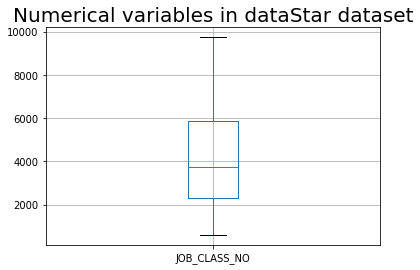

In [ ]:
JOB_CLASS_NO=dataStar[['JOB_CLASS_NO']]
JOB_CLASS_NO.boxplot()
plt.title("Numerical variables in dataStar dataset", fontsize=20)
plt.show()

In [ ]:
'''
def plot_dist(col, ax):
    dataStar[col][dataStar[col].notnull()].value_counts().plot(kind='bar', facecolor='y', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=20)
    ax.set_title("{} on Data".format(col), fontsize= 18)
    return ax

f, ax = plt.subplots(3,3, figsize = (22,15))
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = ['JOB_CLASS_TITLE', 'JOB_CLASS_NO', 'JOB_DUTIES', 'EDUCATION_YEARS',
       'SCHOOL_TYPE', 'EDUCATION_MAJOR',
       'EXPERIENCE_LENGTH', 'FULL_TIME_PART_TIME', 'EXP_JOB_CLASS_TITLE']
k = 0
for i in range(3):
    for j in range(3):
        plot_dist(cols[k], ax[i][j])
        k += 1
__ = plt.suptitle("Initial Distributions of features", fontsize= 25)
'''

'\ndef plot_dist(col, ax):\n    dataStar[col][dataStar[col].notnull()].value_counts().plot(kind=\'bar\', facecolor=\'y\', ax=ax)\n    ax.set_xlabel(\'{}\'.format(col), fontsize=20)\n    ax.set_title("{} on Data".format(col), fontsize= 18)\n    return ax\n\nf, ax = plt.subplots(3,3, figsize = (22,15))\nf.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])\ncols = [\'JOB_CLASS_TITLE\', \'JOB_CLASS_NO\', \'JOB_DUTIES\', \'EDUCATION_YEARS\',\n       \'SCHOOL_TYPE\', \'EDUCATION_MAJOR\',\n       \'EXPERIENCE_LENGTH\', \'FULL_TIME_PART_TIME\', \'EXP_JOB_CLASS_TITLE\']\nk = 0\nfor i in range(3):\n    for j in range(3):\n        plot_dist(cols[k], ax[i][j])\n        k += 1\n__ = plt.suptitle("Initial Distributions of features", fontsize= 25)\n'

In [ ]:
dataStar['JOB_DUTIES'].unique()

array(['An Arts Associate performs a broad range of entry-level professional arts administration work in the areas of: community and public arts program coordination; cultural grant administration; performing arts and festival production; preparation and development of marketing materials; project management in public art, mural commissioning, and conservation of artworks; and art collection management and/or archives, while receiving on-the-job training and experience in preparation for career advancement in various art administration areas.',
       'A Senior Communications Electrician acts as a lead for and works with a small group of employees engaged in the construction, installation, repair, maintenance, and modification of communication systems and equipment such as: radio, microwave transmission, Local Area Network/Wide Area Network data distribution systems, telephone networks, audio, avionic electronics, intrusion alarm systems, mobile digital terminals, dispatch networks, co

In [ ]:
dataStar['JOB_CLASS_TITLE'].nunique()

671

# ***Q1***

# ***A non-experienced job seeker wants to know what is the best job for him?***

In [ ]:
dataStar['EXPERIENCE_LENGTH'].nunique()

41

In [ ]:
dataStar['EXPERIENCE_LENGTH'].unique()

array([nan, 'two years', 'Four years', 'Two years', 'One year',
       'Five years', 'Six years', 'Three years', 'one year',
       '1,040 hours', 'Six months', 'five years', 'Twelve years',
       '1000 cumulative hours', 'four years', 'three years', '1200 hours',
       'Eight years', '1040 hours', 'Seven years', 'Eighteen months',
       'seven years', '21 years', 'Two-years', 'Two and one-half years',
       'Nine years', 'Eighteen (18) months', 'Three months',
       'Two (2) years', 'six months', '600 hours', 'Each year',
       'two (2) years', 'Six (6) months', 'Eight months', '2,080 hours',
       '4,160 hours', 'Five hundred hours', '520 hours', 'six years',
       'One Year', 'one (1) year'], dtype=object)

In [ ]:
dataStar['EXPERIENCE_LENGTH'].value_counts()

Two years                 383
Four years                142
Three years                97
One year                   93
two years                  32
Five years                 29
one year                   28
Six years                  24
Six months                 21
four years                 11
three years                11
Eight years                 5
five years                  4
Eighteen months             4
Two-years                   4
Seven years                 3
21 years                    3
1,040 hours                 2
Eight months                2
Nine years                  2
4,160 hours                 1
Six (6) months              1
2,080 hours                 1
One Year                    1
six years                   1
Five hundred hours          1
520 hours                   1
Each year                   1
two (2) years               1
seven years                 1
600 hours                   1
six months                  1
Two (2) years               1
Three mont

So as we see there is no job with zero experince requierd , but let us take the one year > jobs.

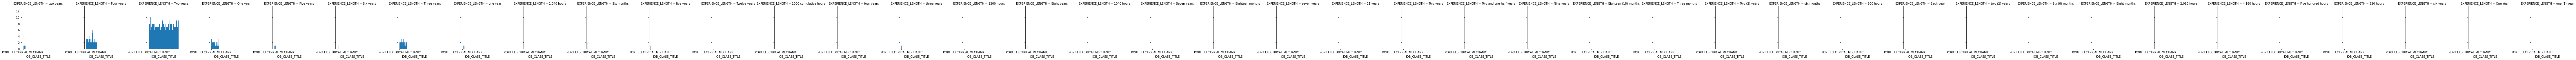

In [ ]:
g = sns.FacetGrid(dataStar, col='EXPERIENCE_LENGTH')
g.map(plt.hist, 'JOB_CLASS_TITLE', bins=50)

In [ ]:
dataStar.loc[(data1['EXPERIENCE_LENGTH'] == 'Six months') | (dataStar['EXPERIENCE_LENGTH'] == 'Five hundred hours'), 'Status'] = 'Found' 
dataStar

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,JOB_CLASS_TITLE,JOB_CLASS_NO,JOB_DUTIES,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EXP_JOB_CLASS_TITLE,COURSE_LENGTH,COURSE_SUBJECT,DRIVERS_LICENSE_REQ,EXAM_TYPE,ENTRY_SALARY_GEN,OPEN_DATE,REQUIREMENTS,req_list,Status
0,ARTS ASSOCIATE,2454,An Arts Associate performs a broad range of en...,four-year,college or university,"Arts (design, literary, media/communication, p...",NaN,NaN,NaN,NaN,NaN,P,OPEN,"$48,797-$71,326",07-21-17,1. A bachelor's degree from an accredited four...,1. A bachelor's degree from an accredited four...,NaN
1,ARTS ASSOCIATE,2454,An Arts Associate performs a broad range of en...,two-year,college with a,"Arts (design, literary, media/communication, p...",two years,full-time,NaN,9 semester units or 14 quarter units,NaN,P,OPEN,"$48,797-$71,326",07-21-17,1. A bachelor's degree from an accredited four...,An associate of arts degree from an accredite...,NaN
2,ARTS ASSOCIATE,2454,An Arts Associate performs a broad range of en...,NaN,NaN,NaN,Four years,full-time,NaN,NaN,NaN,P,OPEN,"$48,797-$71,326",07-21-17,1. A bachelor's degree from an accredited four...,Four years of full-time paid experience withi...,NaN
3,SENIOR COMMUNICATIONS ELECTRICIAN,3638,A Senior Communications Electrician acts as a ...,NaN,NaN,NaN,Two years,full-time,Communications Electrician,NaN,NaN,P,INT_DEPT_PROM,"$94,941 (flat-rated)",03-03-17,Two years of full-time paid experience in a cl...,Two years of full-time paid experience in a cl...,NaN
4,SENIOR AUTOMOTIVE SUPERVISOR,3716,A Senior Automotive Supervisor assists in plan...,NaN,NaN,NaN,Two years,full-time,Automotive Supervisor,NaN,NaN,P,INT_DEPT_PROM,"$103,126-$111,875",11-20-15,Two years of full-time paid experience with th...,Two years of full-time paid experience with th...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,SENIOR STRUCTURAL ENGINEER,9425,"A Senior Structural Engineer plans, organizes ...",NaN,NaN,NaN,Two years,full-time,Structural Engineer,NaN,NaN,P,INT_DEPT_PROM,"$111,373-$158,500",04-07-17,1. Registration as a Structural Engineer with ...,1. Registration as a Structural Engineer with ...,NaN
1109,SENIOR STRUCTURAL ENGINEER,9425,"A Senior Structural Engineer plans, organizes ...",NaN,NaN,NaN,Two years,full-time,"Project Manager I, II, or III",NaN,NaN,P,INT_DEPT_PROM,"$111,373-$158,500",04-07-17,1. Registration as a Structural Engineer with ...,Two years of full-time paid experience with t...,NaN
1110,SENIOR STRUCTURAL ENGINEER,9425,"A Senior Structural Engineer plans, organizes ...",NaN,NaN,NaN,Four years,full-time,Structural Engineering Associate III,NaN,NaN,P,INT_DEPT_PROM,"$111,373-$158,500",04-07-17,1. Registration as a Structural Engineer with ...,Four years of full-time paid professional eng...,NaN
1111,EQUIPMENT SUPERVISOR,3527,"An Equipment Supervisor assigns, reviews and e...",NaN,NaN,NaN,Four years,full-time,Power Shovel Operator,NaN,NaN,P,INT_DEPT_PROM,"$84,918-$99,931",04-13-18,Four years of full-time paid experience with t...,Four years of full-time paid experience with t...,NaN


In [ ]:
print((dataStar['Status']=='Found').value_counts())

False    1091
True       22
Name: Status, dtype: int64


In [ ]:
select_p = dataStar.loc[dataStar['Status'] == 'Found']
print (select_p)

                          JOB_CLASS_TITLE  JOB_CLASS_NO  \
26                      ELECTRICAL TESTER          7512   
30                      ELECTRICAL TESTER          7512   
129         WAREHOUSE AND TOOLROOM WORKER          1832   
239                  ADMINISTRATIVE CLERK          1358   
245     FINGERPRINT IDENTIFICATION EXPERT          1157   
293                         SECURITY AIDE          3199   
486   MAINTENANCE AND CONSTRUCTION HELPER          3115   
526                   ELECTRICAL MECHANIC          3841   
527                   ELECTRICAL MECHANIC          3841   
529                   ELECTRICAL MECHANIC          3841   
557                   ELECTRICAL REPAIRER          3853   
558                   ELECTRICAL REPAIRER          3853   
559                   ELECTRICAL REPAIRER          3853   
745             PROTECTIVE COATING WORKER          3463   
819               ELECTRICAL CRAFT HELPER          3799   
821               ELECTRICAL CRAFT HELPER          3799 

In [ ]:
dataStar['EXPERIENCE_LENGTH'].isnull().sum()

192

In [ ]:
dataStar['EXP_JOB_CLASS_TITLE'].unique()

array([nan, 'Communications Electrician', 'Automotive Supervisor',
       'Mechanical Helper', 'Storekeeper', 'Vocational Worker',
       'Detention Officer', 'Animal Keeper', 'Field Engineering Aide',
       'manual laborer or semi-skilled worker', 'supervisor',
       'Mechanical Repair General Supervisor',
       'Senior Real Estate Officer', 'Real Estate Officer',
       'Senior Claims Representative',
       'journey-level Equipment Mechanic, Heavy Duty Equipment Mechanic',
       'Asbestos Worker', 'Police Detective III',
       'Equipment Repair Supervisor', 'Tree Surgeon Assistant',
       'tree surgeon', 'Senior Building Operating Engineer',
       'Aquatic Facility Manager', 'Computer Operator', 'Fire Captain',
       'Fire Captain I', 'Street Lighting Electrician Supervisor',
       'Water Microbiologist, Chemist', 'Water Biologist III',
       'Project Manager II or III', 'Internal Auditor',
       'Electrical Repair Supervisor', 'Utility Buyer', 'Police Captain',
       'M

# ***Q2- A concerned parents contacts you to tell them if there is a spicific school type that would guaranteed for their child a good future if you can tell, and which is it ?***

#Answer: college or university

```
```



In [ ]:
dataStar['SCHOOL_TYPE']

0       college or university
1              college with a
2                         NaN
3                         NaN
4                         NaN
                ...          
1108                      NaN
1109                      NaN
1110                      NaN
1111                      NaN
1112    college or university
Name: SCHOOL_TYPE, Length: 1113, dtype: object

In [ ]:
dataStar['SCHOOL_TYPE'].isnull().sum()

843

In [ ]:
dataStar['SCHOOL_TYPE'].value_counts()

college or university                                                                 192
apprenticeship                                                                         25
college or trade school                                                                13
law school                                                                              4
high school requirements                                                                3
high school level course work in physics, chemistry, electricity, or electronics        2
university or college                                                                   2
school, college                                                                         2
high school or trade school level                                                       2
college, trade or technical school                                                      2
college, university                                                                     2
school or 

There is a lot of null value here , I will *Not* fillna them , In my opinion, there is no need for that, here we need to find the most frequent type, and we usually if we are going to fill in the empty data, we will fill it with the most frequent value, so I will take the most frequent value from the beginning

In [ ]:
dataStar['SCHOOL_TYPE'].mode()

0    college or university
dtype: object

# *We see here that the most frequent value is college or university. I will take this as an answer, but I will see the most requested major to complete the answer.
*

In [ ]:
dataStar['EDUCATION_MAJOR'].isnull().sum()

983

In [ ]:
dataStar['EDUCATION_MAJOR'].value_counts()

engineering                                                                                                                                                                 7
engineering, which                                                                                                                                                          4
urban planning, urban studies, urban design, architecture, landscape architecture, geography or a closely-related field                                                     3
Library Science or Library and Information Science                                                                                                                          3
physics, chemistry, electricity, or electronics                                                                                                                             3
                                                                                                                                  

# There are so many missing values ​​we can't judge

# ***Q3-What the best time in the year to be ready for a job applying in any experience level?***

In [ ]:
dataStar['OPEN_DATE']

0       07-21-17
1       07-21-17
2       07-21-17
3       03-03-17
4       11-20-15
          ...   
1108    04-07-17
1109    04-07-17
1110    04-07-17
1111    04-13-18
1112    11-14-14
Name: OPEN_DATE, Length: 1113, dtype: object

In [ ]:
dataStar['OPEN_DATE'].isnull().sum()

0

In [ ]:
dataStar['OPEN_DATE'].mode()

0    01-20-17
dtype: object

In [ ]:
dataStar['OPEN_DATE'].value_counts()

01-20-17    19
09-28-18    17
10-19-18    16
11-30-18    16
09-21-18    15
            ..
04-17-15     1
06-20-14     1
12-05-14     1
01-16-15     1
07-22-05     1
Name: OPEN_DATE, Length: 229, dtype: int64

In [ ]:
dataStar['month'] = pd. DatetimeIndex(dataStar['OPEN_DATE']). month
dataStar

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,JOB_CLASS_TITLE,JOB_CLASS_NO,JOB_DUTIES,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EXP_JOB_CLASS_TITLE,COURSE_LENGTH,COURSE_SUBJECT,DRIVERS_LICENSE_REQ,EXAM_TYPE,ENTRY_SALARY_GEN,OPEN_DATE,REQUIREMENTS,req_list,Status,month
0,ARTS ASSOCIATE,2454,An Arts Associate performs a broad range of en...,four-year,college or university,"Arts (design, literary, media/communication, p...",NaN,NaN,NaN,NaN,NaN,P,OPEN,"$48,797-$71,326",07-21-17,1. A bachelor's degree from an accredited four...,1. A bachelor's degree from an accredited four...,NaN,7
1,ARTS ASSOCIATE,2454,An Arts Associate performs a broad range of en...,two-year,college with a,"Arts (design, literary, media/communication, p...",two years,full-time,NaN,9 semester units or 14 quarter units,NaN,P,OPEN,"$48,797-$71,326",07-21-17,1. A bachelor's degree from an accredited four...,An associate of arts degree from an accredite...,NaN,7
2,ARTS ASSOCIATE,2454,An Arts Associate performs a broad range of en...,NaN,NaN,NaN,Four years,full-time,NaN,NaN,NaN,P,OPEN,"$48,797-$71,326",07-21-17,1. A bachelor's degree from an accredited four...,Four years of full-time paid experience withi...,NaN,7
3,SENIOR COMMUNICATIONS ELECTRICIAN,3638,A Senior Communications Electrician acts as a ...,NaN,NaN,NaN,Two years,full-time,Communications Electrician,NaN,NaN,P,INT_DEPT_PROM,"$94,941 (flat-rated)",03-03-17,Two years of full-time paid experience in a cl...,Two years of full-time paid experience in a cl...,NaN,3
4,SENIOR AUTOMOTIVE SUPERVISOR,3716,A Senior Automotive Supervisor assists in plan...,NaN,NaN,NaN,Two years,full-time,Automotive Supervisor,NaN,NaN,P,INT_DEPT_PROM,"$103,126-$111,875",11-20-15,Two years of full-time paid experience with th...,Two years of full-time paid experience with th...,NaN,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,SENIOR STRUCTURAL ENGINEER,9425,"A Senior Structural Engineer plans, organizes ...",NaN,NaN,NaN,Two years,full-time,Structural Engineer,NaN,NaN,P,INT_DEPT_PROM,"$111,373-$158,500",04-07-17,1. Registration as a Structural Engineer with ...,1. Registration as a Structural Engineer with ...,NaN,4
1109,SENIOR STRUCTURAL ENGINEER,9425,"A Senior Structural Engineer plans, organizes ...",NaN,NaN,NaN,Two years,full-time,"Project Manager I, II, or III",NaN,NaN,P,INT_DEPT_PROM,"$111,373-$158,500",04-07-17,1. Registration as a Structural Engineer with ...,Two years of full-time paid experience with t...,NaN,4
1110,SENIOR STRUCTURAL ENGINEER,9425,"A Senior Structural Engineer plans, organizes ...",NaN,NaN,NaN,Four years,full-time,Structural Engineering Associate III,NaN,NaN,P,INT_DEPT_PROM,"$111,373-$158,500",04-07-17,1. Registration as a Structural Engineer with ...,Four years of full-time paid professional eng...,NaN,4
1111,EQUIPMENT SUPERVISOR,3527,"An Equipment Supervisor assigns, reviews and e...",NaN,NaN,NaN,Four years,full-time,Power Shovel Operator,NaN,NaN,P,INT_DEPT_PROM,"$84,918-$99,931",04-13-18,Four years of full-time paid experience with t...,Four years of full-time paid experience with t...,NaN,4


In [ ]:
dataStar['month'].value_counts()

10    121
4     109
12    103
9     102
6      97
7      96
3      94
5      88
11     81
1      81
8      71
2      70
Name: month, dtype: int64

In [ ]:
print(dataStar['month'] ==10)

0       False
1       False
2       False
3       False
4       False
        ...  
1108    False
1109    False
1110    False
1111    False
1112    False
Name: month, Length: 1113, dtype: bool


In [ ]:
select_a = dataStar.loc[dataStar['month'] == 10]
print (select_a)

                                     JOB_CLASS_TITLE  JOB_CLASS_NO  \
5                       WASTEWATER COLLECTION WORKER          4110   
6                       WASTEWATER COLLECTION WORKER          4110   
26                                 ELECTRICAL TESTER          7512   
27                                 ELECTRICAL TESTER          7512   
28                                 ELECTRICAL TESTER          7512   
...                                              ...           ...   
1060                   DIRECTOR OF PRINTING SERVICES          1488   
1101  UNDERGROUND DISTRIBUTION CONSTRUCTION MECHANIC          3812   
1102  UNDERGROUND DISTRIBUTION CONSTRUCTION MECHANIC          3812   
1103  UNDERGROUND DISTRIBUTION CONSTRUCTION MECHANIC          3812   
1104  UNDERGROUND DISTRIBUTION CONSTRUCTION MECHANIC          3812   

                                             JOB_DUTIES EDUCATION_YEARS  \
5     A Wastewater Collection Worker performs a vari...             NaN   
6     A W

In [ ]:
dataStar['month'].describe()

count    1113.000000
mean        6.699012
std         3.411018
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: month, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



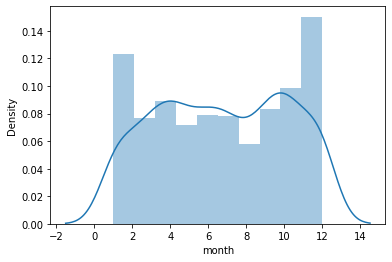

In [ ]:
sns.distplot(dataStar['month']);

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



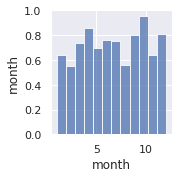

In [ ]:
sns.set()
cols = ['month', 'EXPERIENCE_LENGTH']
sns.pairplot(dataStar[cols], size = 2.5)
plt.show();

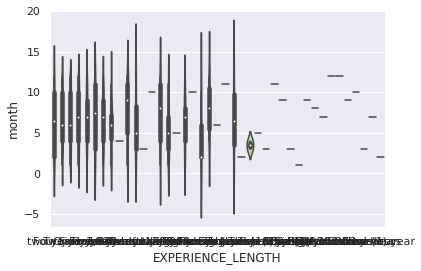

In [ ]:
sns.violinplot(x="EXPERIENCE_LENGTH", y="month", data=dataStar,palette='rainbow')


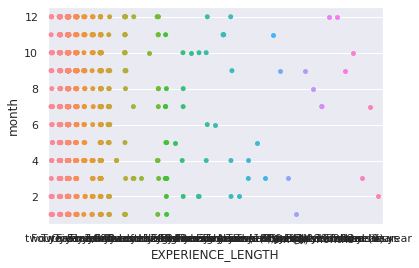

In [ ]:
sns.stripplot(x="EXPERIENCE_LENGTH", y="month", data=dataStar)


In [ ]:
dataStar.loc[dataStar['month'] == 10, ['EXPERIENCE_LENGTH']].value_counts()

EXPERIENCE_LENGTH    
Two years                45
Four years               14
One year                 12
Three years              12
two years                 5
Six months                3
Six years                 3
1000 cumulative hours     1
1040 hours                1
520 hours                 1
Eight years               1
Eighteen months           1
Five years                1
Seven years               1
dtype: int64

In [ ]:
dataStar.loc[dataStar['month'] == 4, ['EXPERIENCE_LENGTH']].value_counts()

EXPERIENCE_LENGTH
Two years            37
Four years           18
Three years          14
One year             10
Five years            6
Six years             3
1,040 hours           2
four years            2
two years             2
Eight years           1
Eighteen months       1
Nine years            1
Two-years             1
dtype: int64

In [ ]:
dataStar.loc[dataStar['month'] == 12, ['EXPERIENCE_LENGTH']].value_counts()

EXPERIENCE_LENGTH
Two years            40
Four years           15
One year             10
Six months            4
Three years           4
two years             3
Five years            2
Six years             2
four years            2
2,080 hours           1
4,160 hours           1
Eighteen months       1
Two-years             1
five years            1
one year              1
dtype: int64

# ***Q4::Is experience more important than educational level?***

This is a comparison between the number of publications requesting the educational level and the experience request appearing. There is no publication that did not set a certain level of experience, but not everyone requested an educational level. So yes, it can be said that experience is more important.

<BarContainer object of 2 artists>

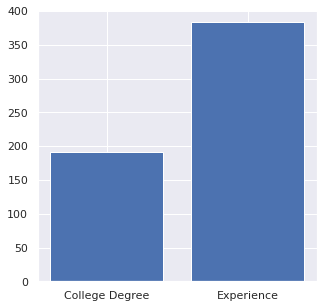

In [ ]:
x1=dataStar['SCHOOL_TYPE'].value_counts()[0]
x2=dataStar['EXPERIENCE_LENGTH'].value_counts()[0]
plt.figure(figsize=(5,5))
plt.bar(height=[x1,x2],x=['College Degree','Experience'])

# ***Q5-Which fresh grade job that will guarantee many job offers in the future for him?***

In [ ]:
dataStar.loc[dataStar['EXPERIENCE_LENGTH'] == 'Six months', ['JOB_CLASS_TITLE']]

,JOB_CLASS_TITLE
26,ELECTRICAL TESTER
30,ELECTRICAL TESTER
129,WAREHOUSE AND TOOLROOM WORKER
239,ADMINISTRATIVE CLERK
245,FINGERPRINT IDENTIFICATION EXPERT
293,SECURITY AIDE
486,MAINTENANCE AND CONSTRUCTION HELPER
526,ELECTRICAL MECHANIC
527,ELECTRICAL MECHANIC
529,ELECTRICAL MECHANIC


In [ ]:
a=(dataStar.loc[dataStar['EXPERIENCE_LENGTH'] == 'One year', ['JOB_CLASS_TITLE']])
a

,JOB_CLASS_TITLE
5,WASTEWATER COLLECTION WORKER
6,WASTEWATER COLLECTION WORKER
19,TRAFFIC OFFICER
48,TREE SURGEON
49,TREE SURGEON
...,...
990,SENIOR LOAD DISPATCHER
995,REPROGRAPHICS OPERATOR
1051,DIRECTOR OF POLICE TRANSPORTATION
1101,UNDERGROUND DISTRIBUTION CONSTRUCTION MECHANIC


In [ ]:
dataStar.loc[dataStar['EXPERIENCE_LENGTH'] == '520 hours', ['JOB_CLASS_TITLE']]

,JOB_CLASS_TITLE
1010,ADMINISTRATIVE HEARING EXAMINER


In [ ]:
dataStar.loc[dataStar['EXPERIENCE_LENGTH'] == 'Four years', ['JOB_CLASS_TITLE']].value_counts()


JOB_CLASS_TITLE                          
DIRECTOR OF SECURITY SERVICES                3
CONSTRUCTION INSPECTOR                       3
PRE-PRESS OPERATOR                           3
BOILERMAKER SUPERVISOR                       2
DIRECTOR OF COMMUNICATIONS SERVICES          2
                                            ..
ELECTRIC TROUBLE DISPATCHER                  1
ELECTRIC SERVICE REPRESENTATIVE              1
ELECTRIC DISTRIBUTION MECHANIC SUPERVISOR    1
DISTRICT SUPERVISOR ANIMAL SERVICES          1
WELDER SUPERVISOR                            1
Length: 124, dtype: int64

In [ ]:
b=(dataStar.loc[dataStar['EXPERIENCE_LENGTH'] == 'Four years', ['JOB_CLASS_TITLE']])
b

,JOB_CLASS_TITLE
2,ARTS ASSOCIATE
18,LAND SURVEYING ASSISTANT
32,LABOR SUPERVISOR
39,PROPERTY MANAGER
44,ASBESTOS SUPERVISOR
...,...
1076,STORES SUPERVISOR
1077,SAFETY ENGINEER
1100,HEAD CUSTODIAN SUPERVISOR
1110,SENIOR STRUCTURAL ENGINEER


In [ ]:
result = dataStar.loc[:, ['EXPERIENCE_LENGTH', 'JOB_CLASS_TITLE']]
print(result)

     EXPERIENCE_LENGTH                    JOB_CLASS_TITLE
0                  NaN                     ARTS ASSOCIATE
1            two years                     ARTS ASSOCIATE
2           Four years                     ARTS ASSOCIATE
3            Two years  SENIOR COMMUNICATIONS ELECTRICIAN
4            Two years       SENIOR AUTOMOTIVE SUPERVISOR
...                ...                                ...
1108         Two years         SENIOR STRUCTURAL ENGINEER
1109         Two years         SENIOR STRUCTURAL ENGINEER
1110        Four years         SENIOR STRUCTURAL ENGINEER
1111        Four years               EQUIPMENT SUPERVISOR
1112         Six years         COMMUNITY AFFAIRS ADVOCATE

[1113 rows x 2 columns]


In [ ]:
for i in result :
  print(i)

EXPERIENCE_LENGTH
JOB_CLASS_TITLE


In [ ]:
for i in dataStar['REQUIREMENTS']:
  print(i)

1. A bachelor's degree from an accredited four-year college or university with a major in Arts (design, literary, media/communication, performing, and/or visual), Cultural Studies, Literature, English, Art History, Art Administration, or a closely related field; or 2. An associate of arts degree from an accredited two-year college with a major in Arts (design, literary, media/communication, performing, and/or visual), Cultural Studies, Literature, English, Art History, Art Administration, or a closely related field, including completion of 9 semester units or 14 quarter units in the fields listed; and two years of full-time paid experience within the last ten years in assisting and coordinating a program in an organization responsible for fine arts, public art, or cultural programs and activities; or 3. Four years of full-time paid experience within the last ten years in assisting and coordinating a program in an organization responsible for fine arts, public art, or cultural programs 

In [ ]:
dataStar['EXP_JOB_CLASS_TITLE'].value_counts()

Management Analyst                      10
Senior Administrative Clerk              8
Senior Management Analyst                8
Civil Engineer                           7
Management Aide                          6
                                        ..
Street Services Superintendent           1
heavy duty equipment mechanic            1
Performing Arts                          1
Senior Communications Electrician        1
Structural Engineering Associate III     1
Name: EXP_JOB_CLASS_TITLE, Length: 465, dtype: int64

In [ ]:
dataStarObject=dataStar.drop(['JOB_CLASS_NO'],axis=1)

In [ ]:
dataStarObject.groupby(['EXPERIENCE_LENGTH','JOB_CLASS_TITLE'])['JOB_CLASS_TITLE'].count()

EXPERIENCE_LENGTH      JOB_CLASS_TITLE            
1,040 hours            AIRPORT GUIDE                  1
                       ANIMAL CARE TECHNICIAN         1
1000 cumulative hours  BACKGROUND INVESTIGATOR        1
1040 hours             GARDENER CARETAKER             1
1200 hours             AQUATIC FACILITY MANAGER       1
                                                     ..
two years              POLICE SPECIAL INVESTIGATOR    1
                       PRINCIPAL LIBRARIAN            1
                       PROGRAMMER ANALYST             1
                       REAL ESTATE OFFICER            1
                       SYSTEMS ANALYST                1
Name: JOB_CLASS_TITLE, Length: 810, dtype: int64

In [ ]:
a=dataStar.loc[(dataStar['EXPERIENCE_LENGTH'] == 'One Year') & (dataStarObject['EXPERIENCE_LENGTH'] == 'One Year'), 'St'] = 'True' 
dataStar['St']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1108    NaN
1109    NaN
1110    NaN
1111    NaN
1112    NaN
Name: St, Length: 1113, dtype: object

In [ ]:
dataStar['St'].isnull().sum()

1112

In [ ]:
dataStar['EXPERIENCE_LENGTH'].unique()

array([nan, 'two years', 'Four years', 'Two years', 'One year',
       'Five years', 'Six years', 'Three years', 'one year',
       '1,040 hours', 'Six months', 'five years', 'Twelve years',
       '1000 cumulative hours', 'four years', 'three years', '1200 hours',
       'Eight years', '1040 hours', 'Seven years', 'Eighteen months',
       'seven years', '21 years', 'Two-years', 'Two and one-half years',
       'Nine years', 'Eighteen (18) months', 'Three months',
       'Two (2) years', 'six months', '600 hours', 'Each year',
       'two (2) years', 'Six (6) months', 'Eight months', '2,080 hours',
       '4,160 hours', 'Five hundred hours', '520 hours', 'six years',
       'One Year', 'one (1) year'], dtype=object)

In [ ]:
dataStar.loc[(dataStar['EXPERIENCE_LENGTH'] == 'Six months')]

,JOB_CLASS_TITLE,JOB_CLASS_NO,JOB_DUTIES,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EXP_JOB_CLASS_TITLE,COURSE_LENGTH,COURSE_SUBJECT,DRIVERS_LICENSE_REQ,EXAM_TYPE,ENTRY_SALARY_GEN,OPEN_DATE,REQUIREMENTS,req_list,Status,month,St
26,ELECTRICAL TESTER,7512,An entry-level Electrical Tester receives inte...,NaN,NaN,NaN,Six months,full-time,NaN,NaN,NaN,R,OPEN,"$54,079-$67,170",10-28-16,1. Six months of full-time paid experience and...,1. Six months of full-time paid experience and...,Found,10,NaN
30,ELECTRICAL TESTER,7512,An entry-level Electrical Tester receives inte...,NaN,NaN,NaN,Six months,full-time,NaN,NaN,NaN,R,OPEN,"$54,079-$67,170",10-28-16,1. Six months of full-time paid experience and...,Six months of full-time experience performing...,Found,10,NaN
129,WAREHOUSE AND TOOLROOM WORKER,1832,A Warehouse and Toolroom Worker performs manua...,NaN,NaN,NaN,Six months,full-time,Utility Pre-Craft,NaN,NaN,P,OPEN,"$39,672-$57,983",09-14-18,"1. One year of full-time paid experience or 2,...",Six months of full-time paid experience as a ...,Found,9,NaN
239,ADMINISTRATIVE CLERK,1358,An Administrative Clerk performs general offic...,NaN,NaN,NaN,Six months,full-time,NaN,NaN,NaN,P,OPEN,"$37,584-$54,935",03-30-18,Six months of full-time paid experience in cle...,Six months of full-time paid experience in cle...,Found,3,NaN
245,FINGERPRINT IDENTIFICATION EXPERT,1157,A Fingerprint Identification Expert uses finge...,NaN,NaN,NaN,Six months,full-time,NaN,NaN,NaN,R,OPEN,"$50,153-$62,305",05-29-15,1. Completion of an accredited course in finge...,Six months of full-time paid experience in te...,Found,5,NaN
293,SECURITY AIDE,3199,Inspects City facilities for security or safet...,NaN,NaN,NaN,Six months,full time,Security Aide,NaN,NaN,P,OPEN,"$34,660-$43,075",09-04-15,1. Six months of full time paid experience at ...,1. Six months of full time paid experience at ...,Found,9,NaN
486,MAINTENANCE AND CONSTRUCTION HELPER,3115,A Maintenance and Construction Helper does a v...,NaN,NaN,NaN,Six months,NaN,Utility Pre-Craft,NaN,NaN,P,OPEN_INT_PROM,"$39,672-$56,438",12-08-17,1. Six months as a Utility Pre-Craft Trainee w...,1. Six months as a Utility Pre-Craft Trainee w...,Found,12,NaN
526,ELECTRICAL MECHANIC,3841,An Electrical Mechanic performs skilled mechan...,NaN,NaN,NaN,Six months,full-time,NaN,NaN,NaN,R,OPEN,"$69,655-$99,514",01-20-17,1. Six months of full-time paid experience per...,1. Six months of full-time paid experience per...,Found,1,NaN
527,ELECTRICAL MECHANIC,3841,An Electrical Mechanic performs skilled mechan...,NaN,NaN,NaN,Six months,full-time,Construction Electrical Helper,NaN,NaN,R,OPEN,"$69,655-$99,514",01-20-17,1. Six months of full-time paid experience per...,"Six months, within the last two years, of ful...",Found,1,NaN
529,ELECTRICAL MECHANIC,3841,An Electrical Mechanic performs skilled mechan...,NaN,NaN,NaN,Six months,full-time,NaN,NaN,NaN,R,OPEN,"$69,655-$99,514",01-20-17,1. Six months of full-time paid experience per...,Six months of full-time experience performing...,Found,1,NaN


In [ ]:
dataStar.loc[(dataStar['EXPERIENCE_LENGTH'] == 'Three months')]

,JOB_CLASS_TITLE,JOB_CLASS_NO,JOB_DUTIES,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EXP_JOB_CLASS_TITLE,COURSE_LENGTH,COURSE_SUBJECT,DRIVERS_LICENSE_REQ,EXAM_TYPE,ENTRY_SALARY_GEN,OPEN_DATE,REQUIREMENTS,req_list,Status,month,St
556,STREET SERVICES WORKER,4150,A Street Services Worker rakes hot mix asphalt...,NaN,NaN,NaN,Three months,full-time,NaN,NaN,NaN,R,OPEN,"$41,760-$61,053",03-23-18,Three months of full-time paid experience in r...,Three months of full-time paid experience in r...,NaN,3,NaN


In [ ]:
dataStar.loc[(dataStar['EXPERIENCE_LENGTH'] == '520 hours')]

,JOB_CLASS_TITLE,JOB_CLASS_NO,JOB_DUTIES,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EXP_JOB_CLASS_TITLE,COURSE_LENGTH,COURSE_SUBJECT,DRIVERS_LICENSE_REQ,EXAM_TYPE,ENTRY_SALARY_GEN,OPEN_DATE,REQUIREMENTS,req_list,Status,month,St
1010,ADMINISTRATIVE HEARING EXAMINER,9135,An Administrative Hearing Examiner conducts qu...,NaN,NaN,NaN,520 hours,NaN,NaN,NaN,NaN,P,OPEN,"$54,726-$80,012",10-09-15,1. Two years of full-time paid experience with...,520 hours of paid experience with the City of...,NaN,10,NaN


In [ ]:
dataStar.loc[(dataStar['EXPERIENCE_LENGTH'] == 'six years')]

,JOB_CLASS_TITLE,JOB_CLASS_NO,JOB_DUTIES,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EXP_JOB_CLASS_TITLE,COURSE_LENGTH,COURSE_SUBJECT,DRIVERS_LICENSE_REQ,EXAM_TYPE,ENTRY_SALARY_GEN,OPEN_DATE,REQUIREMENTS,req_list,Status,month,St
1035,PAYROLL ANALYST,1630,A Payroll Analyst works specifically for the C...,NaN,college or university,NaN,six years,full-time,Payroll Supervisor,NaN,NaN,R,OPEN,"$63,767-$93,229",03-18-16,1. A bachelor's degree from an accredited four...,An associate's degree from an accredited coll...,NaN,3,NaN


In [ ]:
dataStar.loc[(dataStar['EXPERIENCE_LENGTH'] == 'five years')]

,JOB_CLASS_TITLE,JOB_CLASS_NO,JOB_DUTIES,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EXP_JOB_CLASS_TITLE,COURSE_LENGTH,COURSE_SUBJECT,DRIVERS_LICENSE_REQ,EXAM_TYPE,ENTRY_SALARY_GEN,OPEN_DATE,REQUIREMENTS,req_list,Status,month,St
37,DIRECTOR OF PORT CONSTRUCTION AND MAINTENANCE,3123,A Director of Port Construction and Maintenanc...,four year,college or university,"Engineering, Business Management, Business Adm...",five years,full-time,NaN,NaN,NaN,R,OPEN_INT_PROM,"$108,576-$154,512",03-04-16,1. Two years of full-time paid experience with...,A Bachelor's Degree from an accredited four y...,NaN,3,NaN
632,PUBLIC INFORMATION DIRECTOR,1800,"A Public Information Director plans, develops,...",four-year,college or university,NaN,five years,full-time,NaN,24 semester or 36 quarter units,NaN,P,OPEN_INT_PROM,"$85,086-$121,041",03-03-17,1. Two years of full-time paid experience with...,A bachelor's degree from an accredited four-y...,NaN,3,NaN
1024,LEGISLATIVE REPRESENTATIVE,9482,A Legislative Representative represents the Ha...,four-year,college or university,"law, government policy, public policy, public ...",five years,full-time,NaN,NaN,NaN,R,OPEN_INT_PROM,"$91,851-$134,300",12-29-17,1. Two years of full-time paid experience with...,Graduation from an accredited four-year colle...,NaN,12,NaN
1037,FINANCIAL MANAGER,1557,"A Financial Manager manages, or assists in man...",four-year,college or university,"finance, accounting, economics, mathematics, o...",five years,full-time,Financial Accounting Standards Board,NaN,NaN,P,OPEN_INT_PROM,"$87,361-$127,702",07-01-16,1. Three years of full-time paid experience at...,Graduation from an accredited four-year colle...,NaN,7,NaN


# **Q6:-**

In [ ]:
!pip install -q wordcloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
nltk.download('treebank')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
req=' '.join(text for text in dataStar['REQUIREMENTS'])


In [ ]:
from nltk import pos_tag


In [ ]:
import collections


In [ ]:
def pronoun(data):  
    prn=[]
    vrb=[]
    token=word_tokenize(data)
    pos=pos_tag(token)
   
    vrb=collections.Counter([x[0] for x in pos if x[1]=='PRP'])
    
    return vrb
    


req_prn=pronoun(req)
#duties_prn=pronoun(duties)
print('pronouns used in requirement section are')
print(req_prn.keys())
'''
print('\npronouns used in duties section are')
#print(duties_prn.keys())
'''

pronouns used in requirement section are
dict_keys(['you', 'it', 'I', 'they', 'You', 'offset'])


"\nprint('\npronouns used in duties section are')\n#print(duties_prn.keys())\n"

# ***Q7:-***




```
Based on the analysis
```



# ***Q8-***

In [ ]:
dataStar['ENTRY_SALARY_GEN']=data1['ENTRY_SALARY_GEN']
dataStar['ENTRY_SALARY_GEN']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0            $48,797-$71,326
1            $48,797-$71,326
2            $48,797-$71,326
3       $94,941 (flat-rated)
4          $103,126-$111,875
                ...         
1108       $111,373-$158,500
1109       $111,373-$158,500
1110       $111,373-$158,500
1111         $84,918-$99,931
1112       $105,966-$131,648
Name: ENTRY_SALARY_GEN, Length: 1113, dtype: object

In [ ]:
dataStar['DRIVERS_LICENSE_REQ'].value_counts()

P    558
R    451
Name: DRIVERS_LICENSE_REQ, dtype: int64

In [ ]:
dataStar['DRIVERS_LICENSE_REQ'].isnull().sum()

104

In [ ]:
data1['ENTRY_SALARY_GEN'].to_string()

'0             $48,797-$71,326\n1             $48,797-$71,326\n2             $48,797-$71,326\n3        $94,941 (flat-rated)\n4           $103,126-$111,875\n5             $43,973-$62,556\n6             $43,973-$62,556\n7             $52,806-$77,172\n8             $35,746-$52,241\n9        $94,455 (flat-rated)\n10       $94,455 (flat-rated)\n11       $94,455 (flat-rated)\n12       $82,000 (flat-rated)\n13            $51,699-$73,560\n14            $44,411-$64,915\n15            $48,964-$69,656\n16            $31,946-$44,265\n17            $66,440-$97,133\n18            $66,440-$97,133\n19            $45,017-$48,838\n20            $45,017-$48,838\n21       $83,352 (flat-rated)\n22       $83,352 (flat-rated)\n23       $83,352 (flat-rated)\n24            $74,623-$90,222\n25            $74,623-$90,222\n26            $54,079-$67,170\n27            $54,079-$67,170\n28            $54,079-$67,170\n29            $54,079-$67,170\n30            $54,079-$67,170\n31            $66,231-$96,841\n32     

In [ ]:
dataStar['JOB_DUTIES']=dataStar['JOB_DUTIES'].to_string()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data1['ENTRY_SALARY_GEN']=data1['ENTRY_SALARY_GEN'].to_string()

In [ ]:
from IPython.utils.text import list_strings
lis=[]
liss1=[]
for i in data1['ENTRY_SALARY_GEN']:
  lis.append(i)
len(lis)
for i in lis:
  b=i.split('-')
  liss1.append(b)
print(liss1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
lis=set(lis)
lis

{'0             $48,797-$71,326\n1             $48,797-$71,326\n2             $48,797-$71,326\n3        $94,941 (flat-rated)\n4           $103,126-$111,875\n5             $43,973-$62,556\n6             $43,973-$62,556\n7             $52,806-$77,172\n8             $35,746-$52,241\n9        $94,455 (flat-rated)\n10       $94,455 (flat-rated)\n11       $94,455 (flat-rated)\n12       $82,000 (flat-rated)\n13            $51,699-$73,560\n14            $44,411-$64,915\n15            $48,964-$69,656\n16            $31,946-$44,265\n17            $66,440-$97,133\n18            $66,440-$97,133\n19            $45,017-$48,838\n20            $45,017-$48,838\n21       $83,352 (flat-rated)\n22       $83,352 (flat-rated)\n23       $83,352 (flat-rated)\n24            $74,623-$90,222\n25            $74,623-$90,222\n26            $54,079-$67,170\n27            $54,079-$67,170\n28            $54,079-$67,170\n29            $54,079-$67,170\n30            $54,079-$67,170\n31            $66,231-$96,841\n32    

In [ ]:
for i in lis:
  b=i.split('-')
  liss1.append(b)
print(liss1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
DataN=pd.read_csv("jobs.csv")

In [ ]:
dataStar['ENTRY_SALARY_GEN']

0            $48,797-$71,326
1            $48,797-$71,326
2            $48,797-$71,326
3       $94,941 (flat-rated)
4          $103,126-$111,875
                ...         
1108       $111,373-$158,500
1109       $111,373-$158,500
1110       $111,373-$158,500
1111         $84,918-$99,931
1112       $105,966-$131,648
Name: ENTRY_SALARY_GEN, Length: 1113, dtype: object

In [ ]:
dataStar['ENTRY_SALARY_GEN'].to_string()

'0             $48,797-$71,326\n1             $48,797-$71,326\n2             $48,797-$71,326\n3        $94,941 (flat-rated)\n4           $103,126-$111,875\n5             $43,973-$62,556\n6             $43,973-$62,556\n7             $52,806-$77,172\n8             $35,746-$52,241\n9        $94,455 (flat-rated)\n10       $94,455 (flat-rated)\n11       $94,455 (flat-rated)\n12       $82,000 (flat-rated)\n13            $51,699-$73,560\n14            $44,411-$64,915\n15            $48,964-$69,656\n16            $31,946-$44,265\n17            $66,440-$97,133\n18            $66,440-$97,133\n19            $45,017-$48,838\n20            $45,017-$48,838\n21       $83,352 (flat-rated)\n22       $83,352 (flat-rated)\n23       $83,352 (flat-rated)\n24            $74,623-$90,222\n25            $74,623-$90,222\n26            $54,079-$67,170\n27            $54,079-$67,170\n28            $54,079-$67,170\n29            $54,079-$67,170\n30            $54,079-$67,170\n31            $66,231-$96,841\n32     

In [ ]:
dataStar['ENTRY_SALARY_GEN']=DataN['ENTRY_SALARY_GEN']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
keys1=(dataStar.loc[dataStar['DRIVERS_LICENSE_REQ'] == 'R', ['ENTRY_SALARY_GEN']])


In [ ]:
keys2=keys1.values.flatten()
keys2

array(['$43,973-$62,556', '$43,973-$62,556', '$48,964-$69,656',
       '$45,017-$48,838', '$45,017-$48,838', '$83,352 (flat-rated)',
       '$83,352 (flat-rated)', '$83,352 (flat-rated)', '$74,623-$90,222',
       '$74,623-$90,222', '$54,079-$67,170', '$54,079-$67,170',
       '$54,079-$67,170', '$54,079-$67,170', '$54,079-$67,170',
       '$108,576-$154,512', '$108,576-$154,512', '$106,801-$112,752',
       '$47,898-$70,052', '$47,898-$70,052', '$74,082-$89,596',
       '$91,558-$133,882', '$130,875-$138,162', '$107,364-$113,357',
       '$107,886 (flat-rated)', '$65,584-$95,901', '$88,218-$125,551',
       '$102,646-$127,493', '$102,646-$127,493', '$70,010-$94,335',
       '$70,010-$94,335', '$119,767-$175,120', '$119,767-$175,120',
       '$42,595-$62,285', '$102,541-$134,488', '$66,294-$96,904',
       '$91,496-$133,716', '$83,415-$121,939', '$115,570-$122,022',
       '$92,707-$131,919', '$83,144-$100,516', '$83,144-$100,516',
       '$83,144-$100,516', '$83,144-$100,516', '$83,14

In [ ]:
from_total = []
to_total = []

keys = [['$91,913-$134,362'],
 ['$91,913-$134,362'],
 ['$42,991-$62,869'],
 ['$42,991-$62,869'],
 ['$58,777-$83,645'],
 ['$61,554-$89,993'],
 ['$95,672-$136,138'],
 ['$127,200-$158,061'],
 ['$88,009-$109,348'],
 ['$88,009-$109,348'],
 ['$84,731-$94,440'],
 ['$96,444-$119,830'],
 ['$96,444-$119,830'],
 ['$69,864-$102,166'],
 ['$86,610-$123,255'],
 ['$86,610-$123,255'],
 ['$61,512-$82,872'],
 ['$61,658-$90,180'],
 ['$49,882-$74,917'],
 ['$92,524-$106,320'],
 ['$92,524-$106,320'],
 ['$92,524-$106,320'],
 ['$77,715-$104,734'],
 ['$89,888-$94,899'],
 ['$83,352-$103,564'],
 ['$46,812-$58,150'],
 ['$46,625-$70,052'],
 ['$46,625-$70,052'],
 ['$46,625-$70,052'],
 ['$46,625-$70,052'],
 ['$46,625-$70,052'],
 ['$54,392-$77,381'],
 ['$54,392-$77,381'],
 ['$101,831-$148,853'],
 ['$101,831-$148,853'],
 ['$101,831-$148,853'],
 ['$101,831-$148,853'],
 ['$39,839-$58,234'],
 ['$39,839-$58,234'],
 ['$39,839-$58,234'],
 ['$94,001-$116,781'],
 ['$106,404-$155,556'],
 ['$106,404-$155,556'],
 ['$51,448-$75,188'],
 ['$51,448-$75,188'],
 ['$36,519-$53,390'],
 ['$94,857-$138,643'],
 ['$60,969-$89,136'],
 ['$60,969-$89,136'],
 ['$86,025-$106,884'],
 ['$86,025-$106,884'],
 ['$91,851-$134,300'],
 ['$91,851-$134,300'],
 ['$109,787-$160,483'],
 ['$109,787-$160,483'],
 ['$94,419-$99,681'],
 ['$89,637-$131,063'],
 ['$89,637-$131,063'],
 ['$63,767-$93,229'],
 ['$63,767-$93,229'],
 ['$148,561-$184,579'],
 ['$74,709-$106,279'],
 ['$100,370-$124,695'],
 ['$100,370-$124,695'],
 ['$71,409-$88,719'],
 ['$117,596-$171,946'],
 ['$117,596-$171,946'],
 ['$69,655-$89,544'],
 ['$69,655-$89,544'],
 ['$69,655-$89,544'],
 ['$58,171-$85,044'],
 ['$127,910-$187,022'],
 ['$102,729-$150,210'],
 ['$102,729-$150,210'],
 ['$85,900-$125,593'],
 ['$85,900-$125,593'],
 ['$83,290-$121,772'],
 ['$173,554-$193,432'],
 ['$173,554-$193,432'],
 ['$173,554-$193,432'],
 ['$54,037-$65,333'],
 ['$70,783-$87,946'],
 ['$70,783-$87,946'],
 ['$70,783-$87,946'],
 ['$70,783-$87,946'],
 ['$90,410-$109,306'],
 ['$90,410-$109,306'],
 ['$56,793-$80,826']]

for item in keys:
    key = item[0]
    key = key.replace('$','')
    key = key.replace(',','.')
    temp = key.split('-')
    from_total.append(float(temp[0]))
    to_total.append(float(temp[1]))

print(sum(from_total)/len(from_total))
print(sum(to_total)/len(to_total))

82.36470454545452
110.80843181818187


# ***Q9:-***


```
Based on the Bivariate analysis
```



# ***Q11:-***

In [ ]:
dataStarObject=dataStar.drop(['JOB_CLASS_NO'],axis=1)

In [ ]:
dataStarObject.columns.values

array(['JOB_CLASS_TITLE', 'JOB_DUTIES', 'EDUCATION_YEARS', 'SCHOOL_TYPE',
       'EDUCATION_MAJOR', 'EXPERIENCE_LENGTH', 'FULL_TIME_PART_TIME',
       'EXP_JOB_CLASS_TITLE', 'COURSE_LENGTH', 'COURSE_SUBJECT',
       'DRIVERS_LICENSE_REQ', 'EXAM_TYPE', 'ENTRY_SALARY_GEN',
       'OPEN_DATE', 'REQUIREMENTS', 'req_list', 'Status', 'month', 'St'],
      dtype=object)

In [ ]:
dataStarObject.describe(include=['O'])

,JOB_CLASS_TITLE,JOB_DUTIES,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EXP_JOB_CLASS_TITLE,COURSE_LENGTH,COURSE_SUBJECT,DRIVERS_LICENSE_REQ,EXAM_TYPE,ENTRY_SALARY_GEN,OPEN_DATE,REQUIREMENTS,req_list,Status,St
count,1113,1113,157,270,130,921,903,634,95,42,1009,1113,1112,1113,1113,1113,22,1
unique,671,1,6,31,107,41,4,465,33,38,2,3,597,229,675,1100,1,1
top,CONSTRUCTION INSPECTOR,0 An Arts Associate performs a broad ran...,four-year,college or university,engineering,Two years,full-time,Management Analyst,12 semester or 18 quarter units,Fire Science/Fire Protection Administration,P,INT_DEPT_PROM,"$83,144-$100,516",01-20-17,1. One year of full-time paid experience as a ...,Registration as a Professional Engineer with ...,Found,True
freq,8,1113,134,192,7,383,892,10,14,3,558,445,16,19,8,4,22,1


In [ ]:
dataStarObject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   JOB_CLASS_TITLE      1113 non-null   object
 1   JOB_DUTIES           1113 non-null   object
 2   EDUCATION_YEARS      157 non-null    object
 3   SCHOOL_TYPE          270 non-null    object
 4   EDUCATION_MAJOR      130 non-null    object
 5   EXPERIENCE_LENGTH    921 non-null    object
 6   FULL_TIME_PART_TIME  903 non-null    object
 7   EXP_JOB_CLASS_TITLE  634 non-null    object
 8   COURSE_LENGTH        95 non-null     object
 9   COURSE_SUBJECT       42 non-null     object
 10  DRIVERS_LICENSE_REQ  1009 non-null   object
 11  EXAM_TYPE            1113 non-null   object
 12  ENTRY_SALARY_GEN     1112 non-null   object
 13  OPEN_DATE            1113 non-null   object
 14  REQUIREMENTS         1113 non-null   object
 15  req_list             1113 non-null   object
 16  Status

In [ ]:
for i in dataStarObject:
  print('DataCol','Null value ',i,' ',dataStarObject[i].isnull().sum())

DataCol Null value  JOB_CLASS_TITLE   0
DataCol Null value  JOB_DUTIES   0
DataCol Null value  EDUCATION_YEARS   956
DataCol Null value  SCHOOL_TYPE   843
DataCol Null value  EDUCATION_MAJOR   983
DataCol Null value  EXPERIENCE_LENGTH   192
DataCol Null value  FULL_TIME_PART_TIME   210
DataCol Null value  EXP_JOB_CLASS_TITLE   479
DataCol Null value  COURSE_LENGTH   1018
DataCol Null value  COURSE_SUBJECT   1071
DataCol Null value  DRIVERS_LICENSE_REQ   104
DataCol Null value  EXAM_TYPE   0
DataCol Null value  ENTRY_SALARY_GEN   1
DataCol Null value  OPEN_DATE   0
DataCol Null value  REQUIREMENTS   0
DataCol Null value  req_list   0
DataCol Null value  Status   1091
DataCol Null value  month   0
DataCol Null value  St   1112


In [ ]:
for i in dataStarObject:
  print('DataCol',i,' ',dataStarObject[i].value_counts(),'\n')

DataCol JOB_CLASS_TITLE   CONSTRUCTION INSPECTOR                   8
ELECTRICAL REPAIRER                      7
ELECTRICAL MECHANIC                      7
CAMPUS INTERVIEWS ONLY                   7
HOUSING INSPECTOR                        6
                                        ..
PRINCIPAL DETENTION OFFICER              1
ASSISTANT STREET LIGHTING ELECTRICIAN    1
DATABASE ARCHITECT                       1
TREASURY ACCOUNTANT                      1
COMMUNITY AFFAIRS ADVOCATE               1
Name: JOB_CLASS_TITLE, Length: 671, dtype: int64 

DataCol JOB_DUTIES   0       An Arts Associate performs a broad range of en...\n1       An Arts Associate performs a broad range of en...\n2       An Arts Associate performs a broad range of en...\n3       A Senior Communications Electrician acts as a ...\n4       A Senior Automotive Supervisor assists in plan...\n5       A Wastewater Collection Worker performs a vari...\n6       A Wastewater Collection Worker performs a vari...\n7       A Senior

In [ ]:
dataStarObject.groupby(['EDUCATION_MAJOR','ENTRY_SALARY_GEN'])['ENTRY_SALARY_GEN'].count()

EDUCATION_MAJOR                                                                                                                                                                                                                              ENTRY_SALARY_GEN    
Accounting                                                                                                                                                                                                                                   $59,361-$86,819         1
Animal Science, Animal Management, Administration of Justice, or related course work                                                                                                                                                         $46,374-$67,818         1
Architect                                                                                                                                                                                                               

In [ ]:
dataStarObject.groupby(['EDUCATION_YEARS','ENTRY_SALARY_GEN'])['ENTRY_SALARY_GEN'].count()

EDUCATION_YEARS  ENTRY_SALARY_GEN    
One year         $51,448-$75,188         1
                 $59,487-$86,965         1
                 $70,783-$87,946         2
                 $83,144-$100,516        1
                 $90,034 (flat-rated)    1
                                        ..
two-year         $58,986-$86,255         1
                 $70,094 (flat-rated)    1
                 $78,675 (flat-rated)    1
                 $78,801-$85,237         1
                 $92,524-$106,320        1
Name: ENTRY_SALARY_GEN, Length: 125, dtype: int64

In [ ]:
dataStarObject.groupby(['EXPERIENCE_LENGTH','ENTRY_SALARY_GEN'])['ENTRY_SALARY_GEN'].count()

EXPERIENCE_LENGTH      ENTRY_SALARY_GEN
1,040 hours            $31,946-$44,265     1
                       $38,565-$56,396     1
1000 cumulative hours  $62,514-$91,370     1
1040 hours             $39,672-$57,983     1
1200 hours             $44,933-$65,688     1
                                          ..
two years              $86,777-$123,463    1
                       $87,883-$128,516    1
                       $90,473-$132,274    1
                       $92,769-$115,278    1
                       $93,918-$137,327    1
Name: ENTRY_SALARY_GEN, Length: 764, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



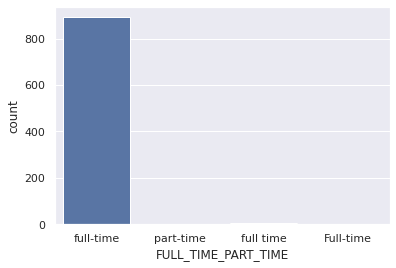

In [ ]:
sns.countplot('FULL_TIME_PART_TIME', data=dataStarObject)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



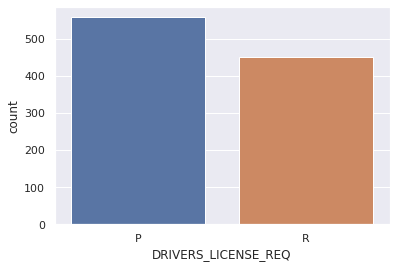

In [ ]:
sns.countplot('DRIVERS_LICENSE_REQ', data=dataStarObject)
plt.show()

In [ ]:
pcontingency_table = pd.crosstab(dataStarObject['EXPERIENCE_LENGTH'],dataStarObject['ENTRY_SALARY_GEN'])
pcontingency_table

ENTRY_SALARY_GEN,"$100,203-$124,507","$100,370-$124,695","$100,370-$146,744","$100,829 (flat-rated)","$101,643-$126,282","$101,664-$148,665","$101,831-$148,853","$102,165-$149,375","$102,186-$134,028","$102,353-$149,667",...,"$97,697-$103,147","$97,781-$142,944","$97,895 (flat-rated)","$98,261-$143,633","$98,971 (flat-rated)","$99,012 (flat-rated)","$99,305-$123,379","$99,326-$141,378","$99,347 (flat-rated)","$99,618-$141,775"
EXPERIENCE_LENGTH,,,,,,,,,,,,,,,,,,,,,
"1,040 hours",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000 cumulative hours,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1040 hours,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1200 hours,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"2,080 hours",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21 years,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"4,160 hours",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
520 hours,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
600 hours,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


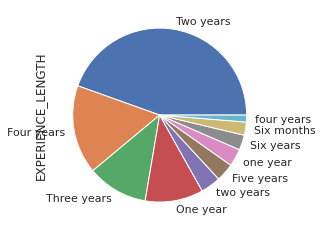

In [ ]:
dataStarObject['EXPERIENCE_LENGTH'].value_counts().head(10).plot.pie()

# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')


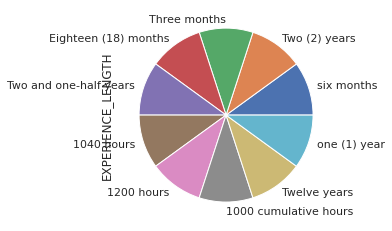

In [ ]:
dataStarObject['EXPERIENCE_LENGTH'].value_counts().tail(10).plot.pie()

# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

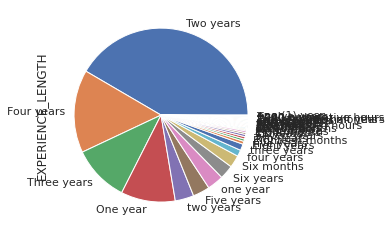

In [ ]:
dataStarObject['EXPERIENCE_LENGTH'].value_counts().head(500).plot.pie()

# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

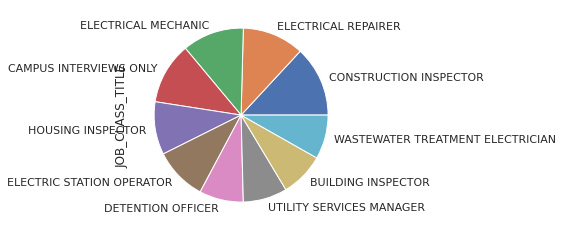

In [ ]:
dataStarObject['JOB_CLASS_TITLE'].value_counts().head(10).plot.pie()

# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

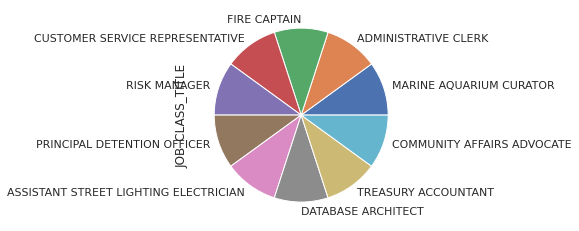

In [ ]:
dataStarObject['JOB_CLASS_TITLE'].value_counts().tail(10).plot.pie()

# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

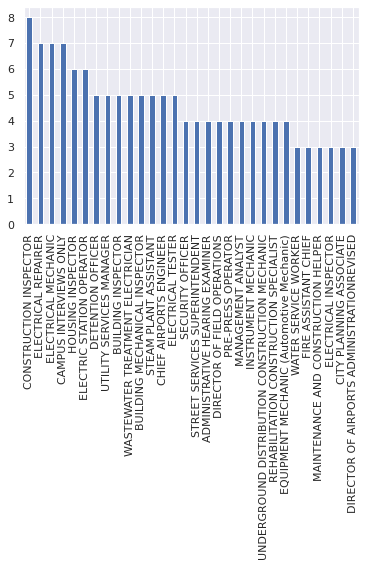

In [ ]:
dataStarObject['JOB_CLASS_TITLE'].value_counts().head(30).plot.bar()


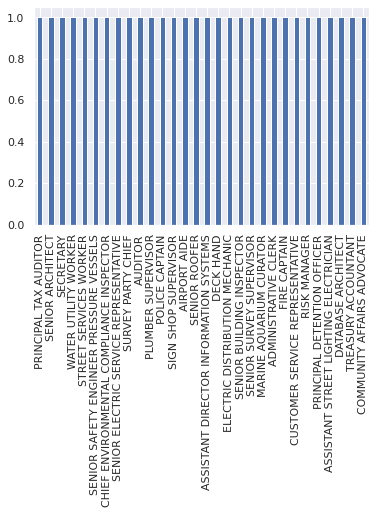

In [ ]:
dataStarObject['JOB_CLASS_TITLE'].value_counts().tail(30).plot.bar()


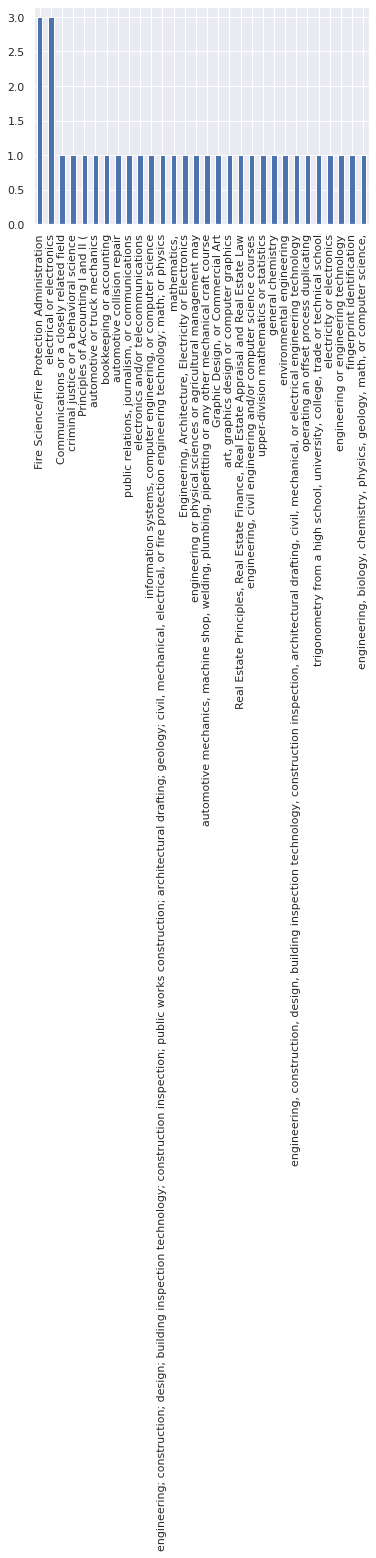

In [ ]:
dataStarObject['COURSE_SUBJECT'].value_counts().head(30).plot.bar()


# ***Q10:-***

I describe the rest cols as catogircal cols , so we have left JOB_CLASS_NO col , there is not much statics here because it seems like ID for the job .

In [ ]:
dataStar.describe()


,JOB_CLASS_NO,month
count,1113.000000,1113.000000
mean,4295.865229,6.699012
std,2433.845820,3.411018
min,602.000000,1.000000
25%,2331.000000,4.000000
50%,3753.000000,7.000000
75%,5885.000000,10.000000
max,9734.000000,12.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



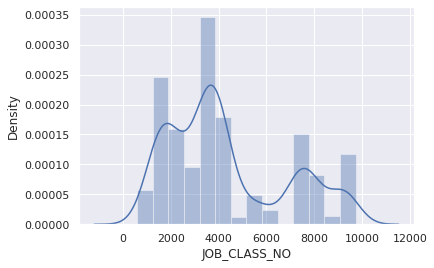

In [ ]:
sns.distplot(dataStar['JOB_CLASS_NO'])

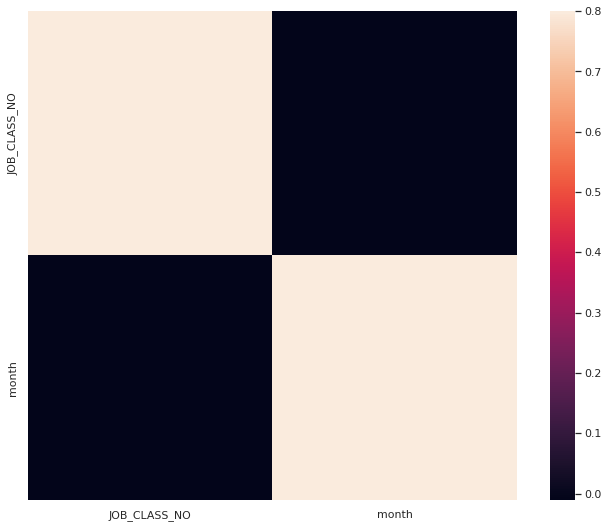

In [ ]:
corrmat = dataStar.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
total = dataStar.isnull().sum().sort_values(ascending=False)
total

St                     1112
Status                 1091
COURSE_SUBJECT         1071
COURSE_LENGTH          1018
EDUCATION_MAJOR         983
EDUCATION_YEARS         956
SCHOOL_TYPE             843
EXP_JOB_CLASS_TITLE     479
FULL_TIME_PART_TIME     210
EXPERIENCE_LENGTH       192
DRIVERS_LICENSE_REQ     104
ENTRY_SALARY_GEN          1
JOB_CLASS_NO              0
EXAM_TYPE                 0
OPEN_DATE                 0
REQUIREMENTS              0
req_list                  0
JOB_DUTIES                0
month                     0
JOB_CLASS_TITLE           0
dtype: int64